## Librerias

In [129]:
!pip install researchpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import math
import researchpy as rp


plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## Funciones


In [131]:
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])



## Cargue de la Base

La base es tomada de la pagina de Kaggel: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv es una base que contiene informacion de clientes que tiene como caracteristica la marcacion de si ha sido o no moroso.

La descripcion de las caracteristicas son:

All values were provided at the time of the loan application.

* income:               Income of the user	(int)

* age:                  Age of the user	(int)

* experience:         	Professional experience of the user in years	(int)

* profession:          	Profession	(string)

* married:            	Whether married or single	(string)

* house_ownership:     	Owned or rented or neither	(string)

* car_ownership:      	Does the person own a car	(string)

* risk_flag:          	Defaulted on a loan	(string)

* current_job_years:  	Years of experience in the current job	(int)

* current_house_years: 	Number of years in the current residence	(int)

* city:               	City of residence	(string)

* state:              	State of residence	(string)

**Note:** *The risk_flag indicates whether there has been a default in the past or not.*



In [132]:
loan = pd.read_csv(r"D:\Usuario Carolina\Documents\Especializacion\Monografia\Loan_Behavior\Data\Training Data.csv") #Cargue de la base de datos
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [133]:
#Eliminamos la variables ID ya que es un dato de conteo y no aporta a la informacion de la base
loan = loan.drop(columns = 'Id')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


## Visualizacion de los Datos

Se inicia realizando la visualizacion de las distribuciones de los datos para conocer como se encuentran estos. 

En caso de que lo requiera, se realizara normalizacion de los datos y tambien se evaluara correlacionde las variables respectoa la variable de salida, en dado caso se decidira si se consideraran todas para el modelamiento o no.

Para su analisis de dividiran los datos entre:


*   Variable de Salida
*   Variables Categoricas
*   Variables Numericas




### Variable de Salida

Para este dataset la variable de salida es "Risk_Flag" que recibe valores de 0 o 1. Donde es 0 es que no ha estado en mora y 1 que si. Se espera que esta distribucion sean mas o menos igual y que no este desbalanceada en uno de los dos valores.

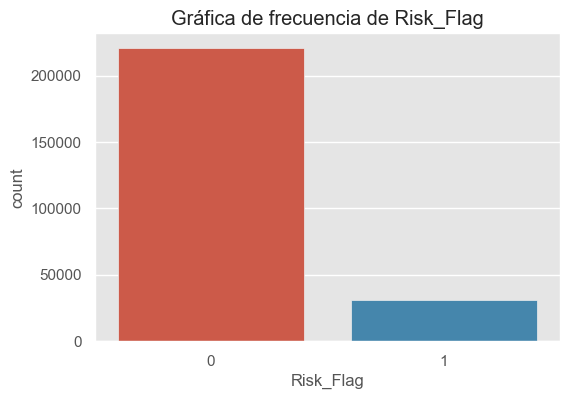

In [134]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de Risk_Flag')#Crea una grafica para observar la distribucion de la variable de salida Risk Flag
sns.countplot(x=loan['Risk_Flag'])

plt.show()

Como se observa en la grafica, la variable de salida esta desbalanceada. Inicialmente se modelara el dataset con la variable de salida en esta distribucion, posteriormente se evaluara si se hace necesario balancearla.

### Variables Categoricas

Se analizara las distribucion de las variables que en el dataset sean de tipo "Object". Se graficaran respecto a su relacicon con la variable de salida.

In [135]:
cat=loan.select_dtypes(include = ["object"]).columns.tolist()#Crea una lista de las variables categoricas de la base
loan[cat].head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [136]:
loan[cat].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Al ser variables categoricas su tabla de descripcion solo nos muetra, como dato importante, la cantidad de valores de entrada que recibe.

In [137]:
cat

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

Se graficara algunas de las variables categoricas con respecto a la variable de salida, solo se realizara con 'Married/Single', 'House_Ownership','Car_Ownership'.

**Relacion de Married/Single con Risk_Flag**

<Axes: xlabel='Married/Single', ylabel='count'>

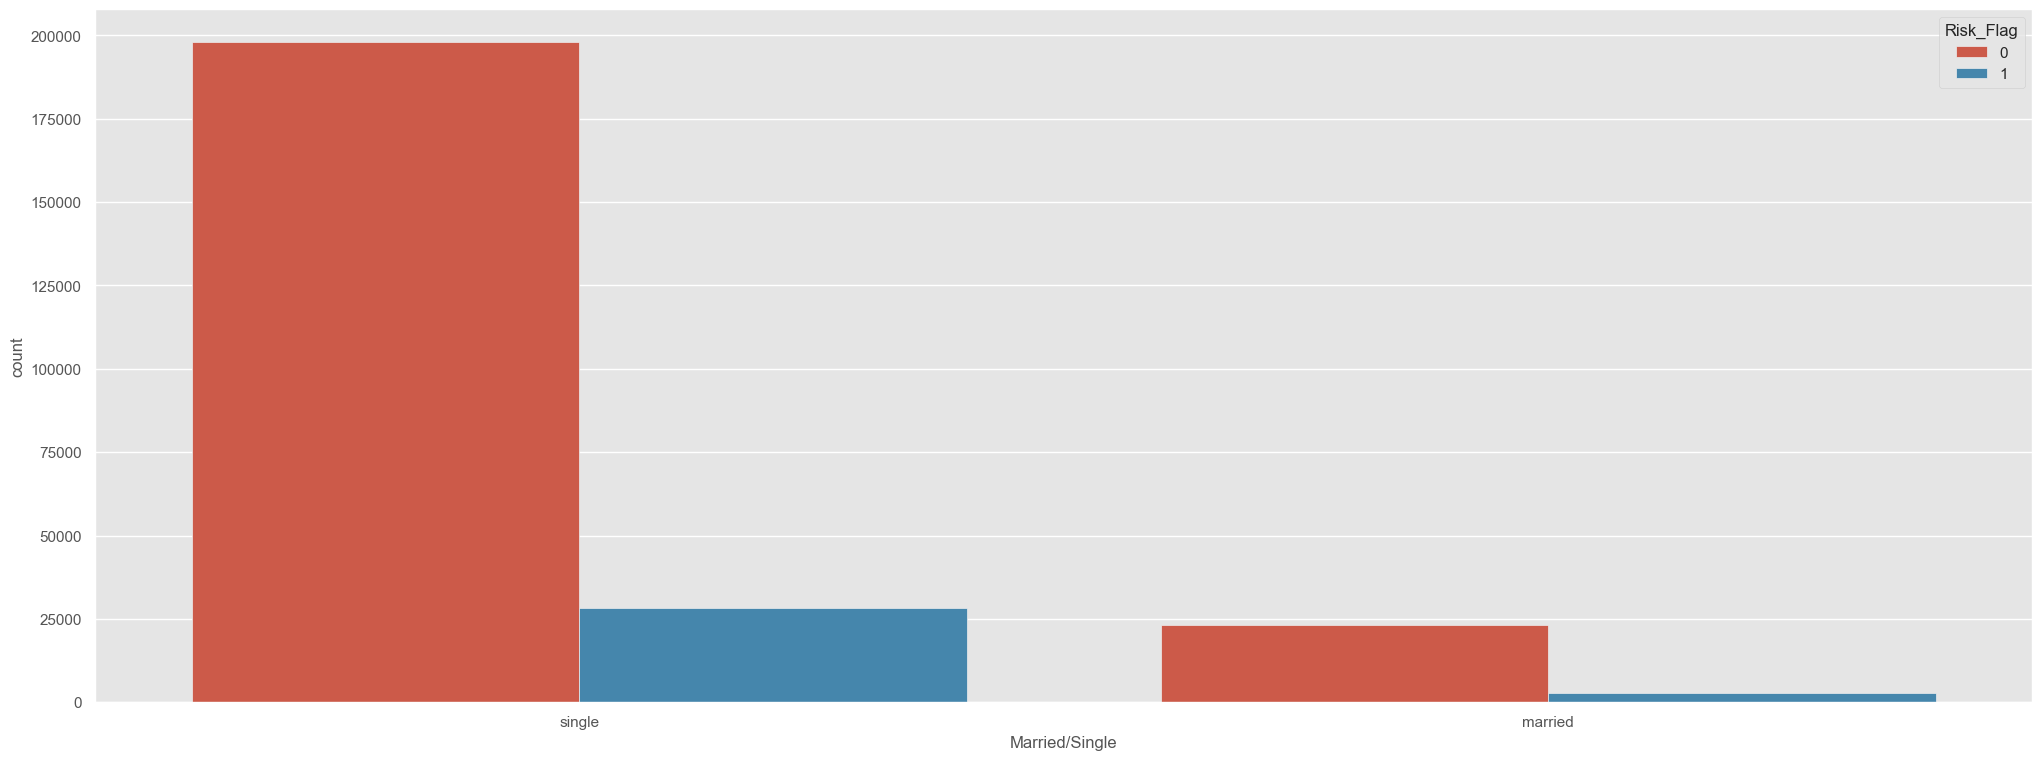

In [138]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=loan)

**Relacion de House_Ownership con Risk_Flag**

<Axes: xlabel='House_Ownership', ylabel='count'>

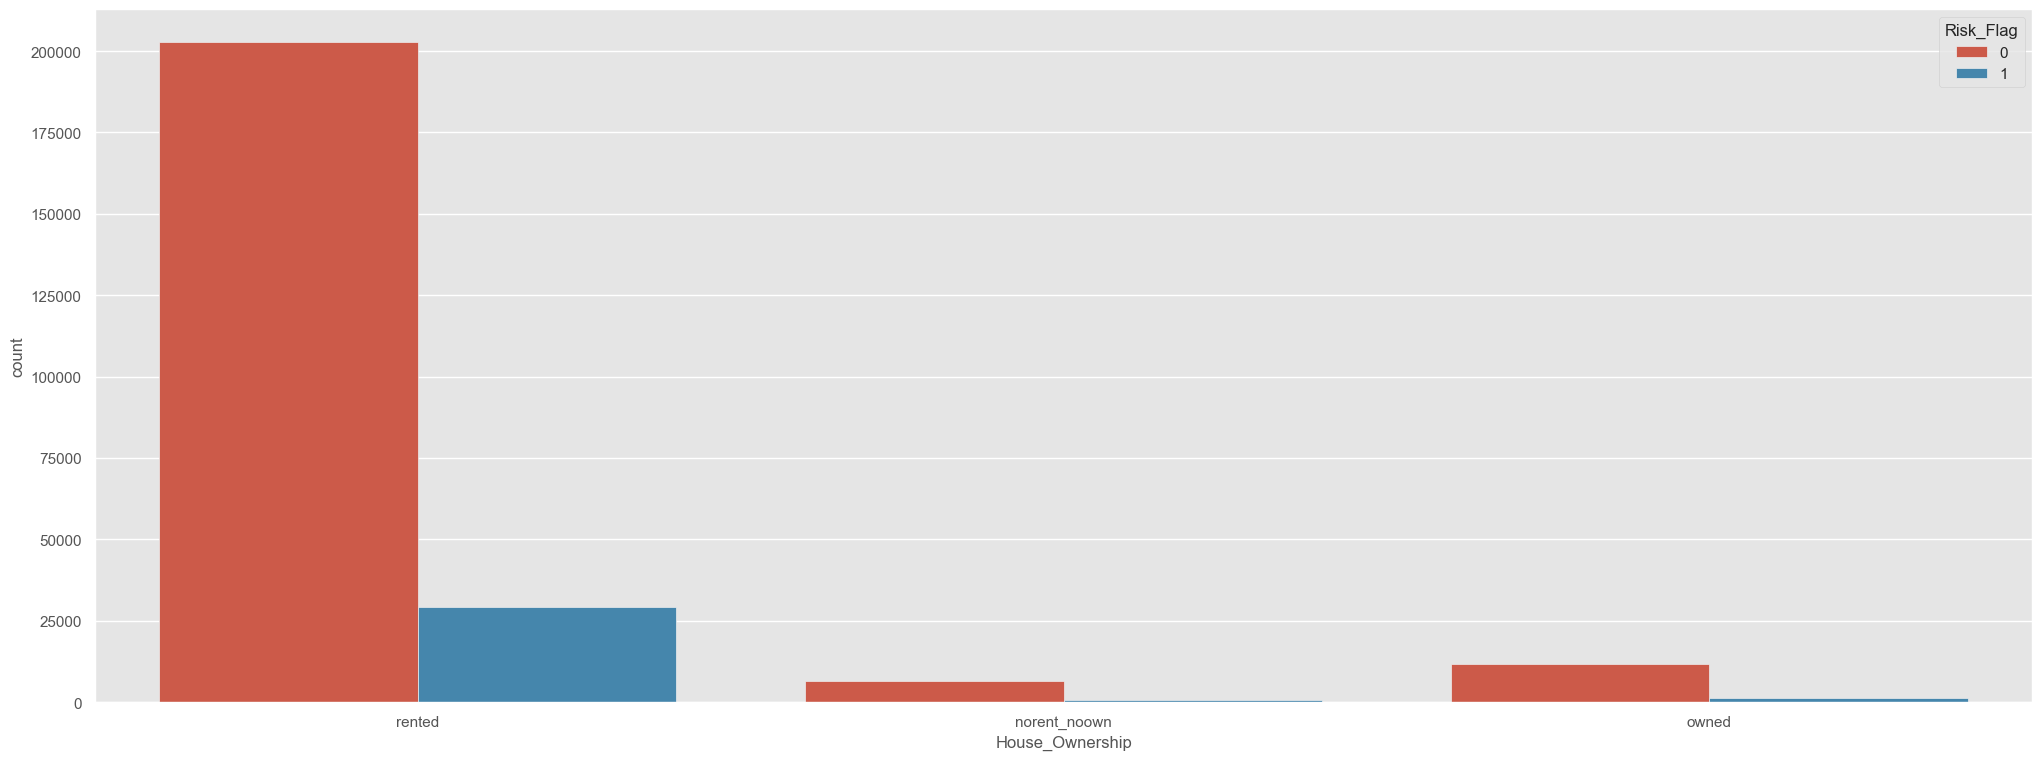

In [139]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=loan)

**Relacion de Car_Ownership con Risk_Flag**

<Axes: xlabel='Car_Ownership', ylabel='count'>

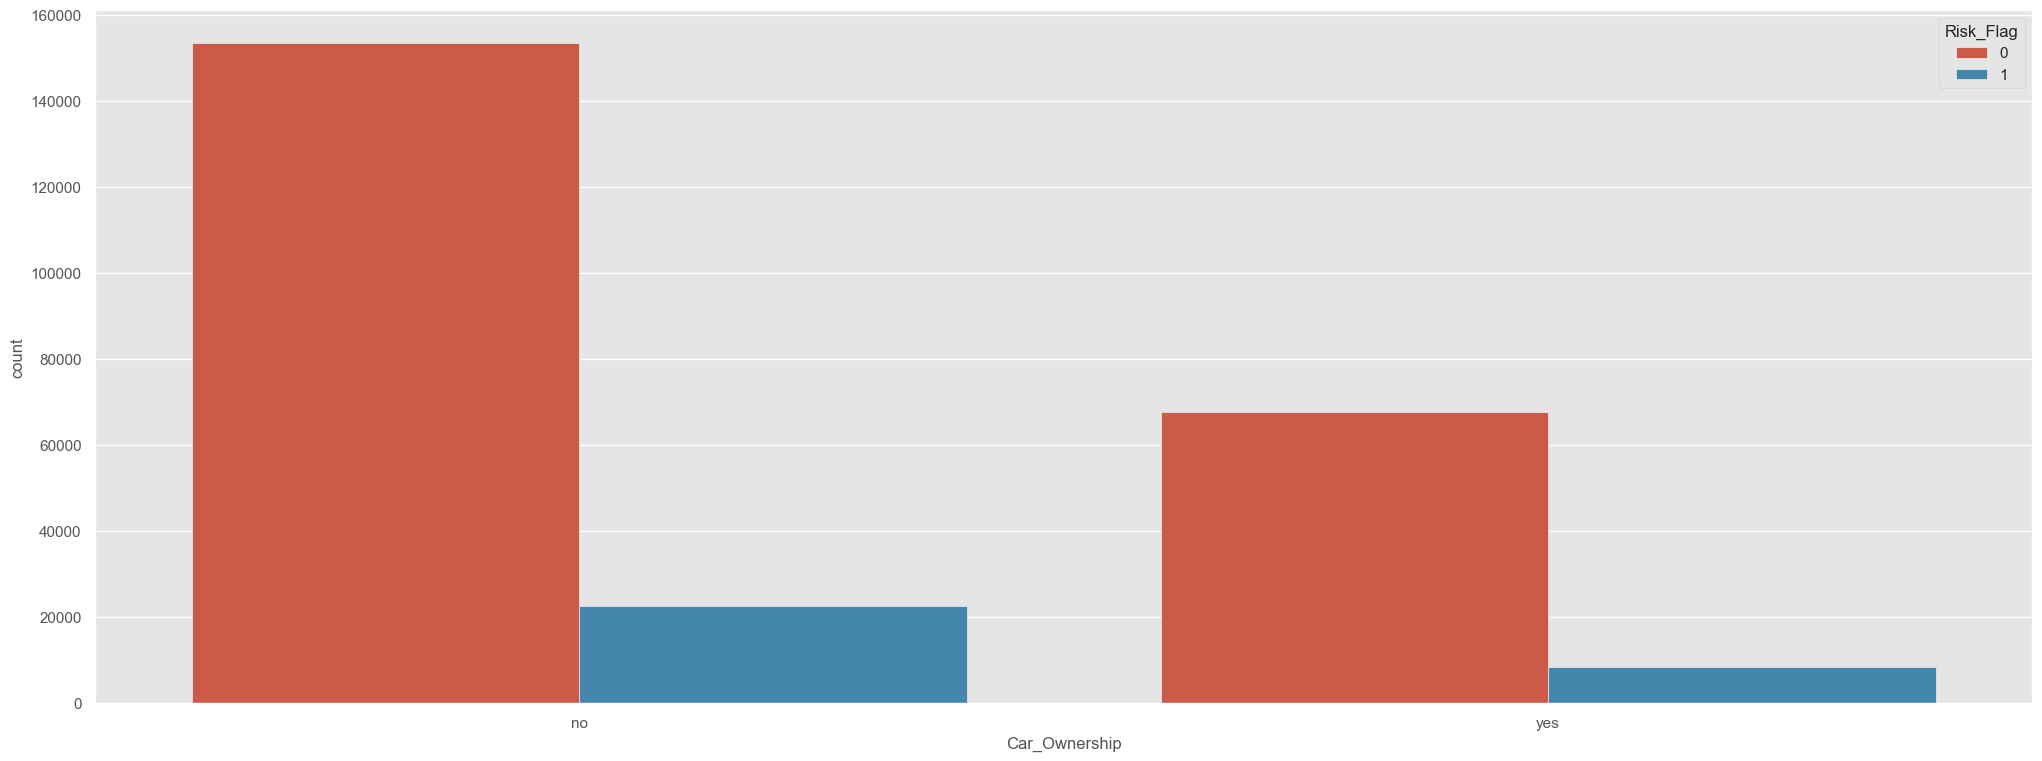

In [140]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=loan)

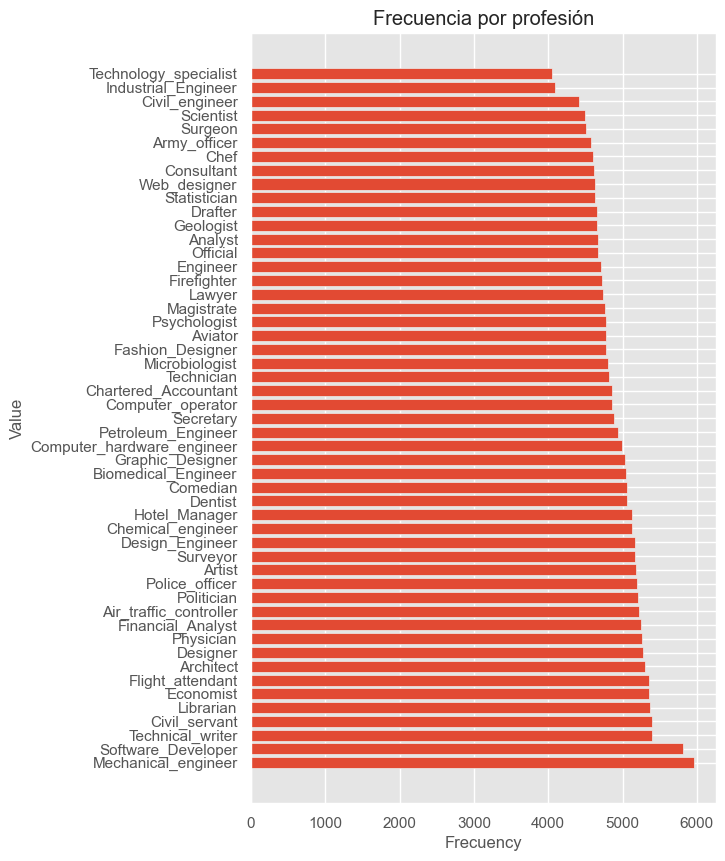

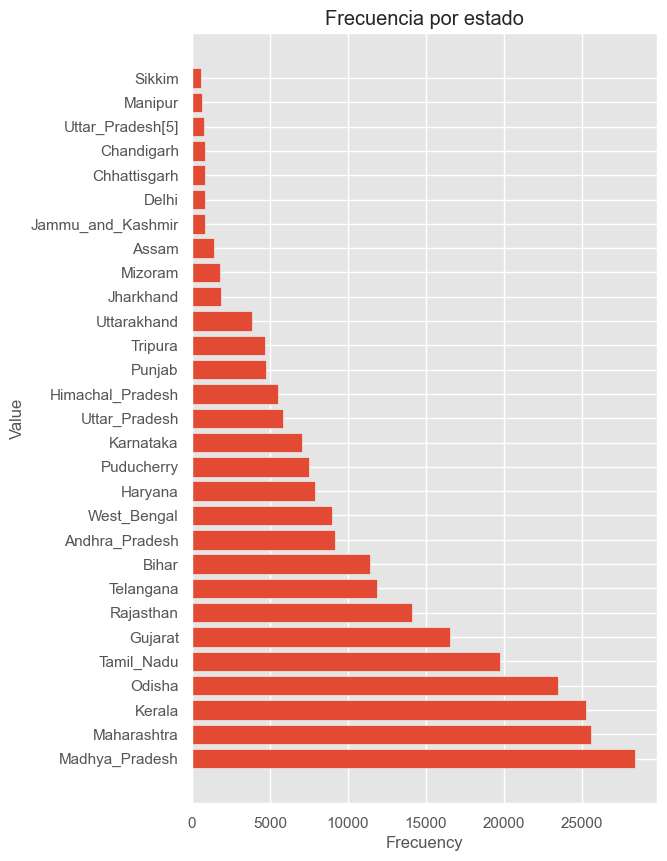

In [141]:
variables = [loan["Profession"], loan["STATE"]]
titles = ["Frecuencia por profesión", "Frecuencia por estado"]

for var, title in zip(variables, titles):
    labels = var.unique().tolist()
    values = var.value_counts().tolist()

    fig, ax = plt.subplots(figsize=(6, 10))
    ax.barh(labels, values)

    # Etiquetas y título
    ax.set_xlabel("Frecuency")
    ax.set_ylabel("Value")
    ax.set_title(title)

    plt.show()

Se analizará la relación de las variables categóricas con las variables de salida y entre ellas a través de una tabla de contingencia y sus coeficientes. De acuerdo con los resultados se analizará la posibilidad de eliminar alguna variable o no.

In [142]:
#Analisis de relacion de las variables categoricas a trave de una tabla y coeficiente de contingencia
colum = list(loan[cat].columns)#Se cre una variable que almacene la lista de variables categoricas
colum.append('Risk_Flag')#Le adicionamos la variable de salida a este listado para poder conocer el coeficiente de contingencia de las variables con respectoa esta

coe_total = [] #lista vacia para almacear los coeficientes
for j in colum:
  coe=[] #lista vacia para almacenar los coeficientes por fila
  for i in colum:
    table, results = rp.crosstab(loan[j], loan[i], test='chi-square')
    print('--------------------------------------------------------------')
    print(table)
    print(results)

    coefficient = results.loc[2, 'results']
    print("Coeficiente de contingencia: ", coefficient)
    coe.append(coefficient)
  coe_total.append(coe)




--------------------------------------------------------------
               Married/Single                
Married/Single        married  single     All
Married/Single                               
married                 25728       0   25728
single                      0  226272  226272
All                     25728  226272  252000
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   252000.0
1                    p-value =        0.0
2               Cramer's phi =        1.0
Coeficiente de contingencia:  1.0
--------------------------------------------------------------
                House_Ownership                       
House_Ownership    norent_noown  owned  rented     All
Married/Single                                        
married                     595    923   24210   25728
single                     6589  11995  207688  226272
All                        7184  12918  231898  252000
                Chi-square test   results
0  Pearson Chi-square ( 

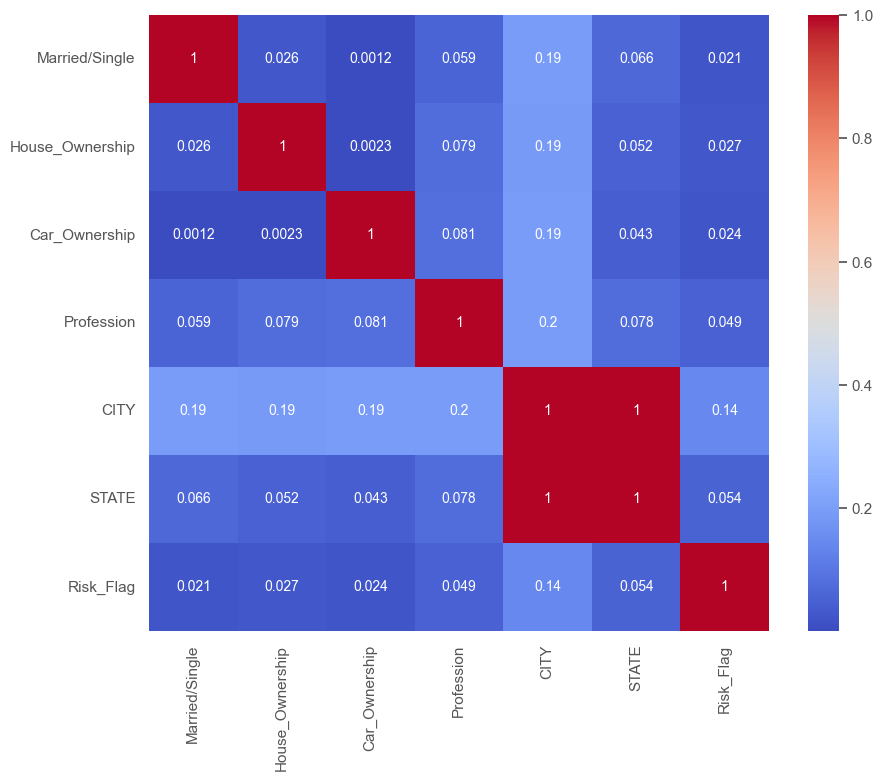

In [143]:
coe_total = np.array(coe_total)

plt.figure(figsize=(10, 8))
sns.heatmap(coe_total, xticklabels=colum, yticklabels=colum, cmap='coolwarm', annot=True)#Crea un mapa de calor con los coeficientes de contingencia almacenados
plt.show()

En relación a la variable de salida, no hoy alguna con un coeficiente de contingencia superior a 0.5, que indicaría que no hay mayor asociación entre las variables. Sin embargo, si existen un coeficiente de 1 entre State y City, lo que da para que se pueda eliminar una de ellas, para este trabajo se eliminara City que tiene más valores únicos que State, lo que al realizar un one hold encoding agregaría más variables.

### Variables Numericas


Se realizara la visualizacion de las variables nuemricas a traves de graficos y la descripcion de los mismos. Se realizara sobre las variables de tipo 'int 64'. Como la variable de salida es de este tipo, se elimina para poder estudiar las demas sin afectar a esta.


In [144]:
#Seleccionar las variables de tipo int64 se extraen de la base para observacion
num=loan.select_dtypes(include = ["int64"]).columns.tolist()
num.remove('Risk_Flag')#Como se van a normalizar las variables, quitamos de la lista la variable de salida
loan[num].head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,3,13
1,7574516,40,10,9,13
2,3991815,66,4,4,10
3,6256451,41,2,2,12
4,5768871,47,11,3,14


In [145]:
loan[num].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


En esta descripción se ve que los valores de las variables numéricas no se encuentran dentro de un estándar y hay unas variables que toman unos valores muy pequeños con respecto a los que toman otras, el valor de income toma un valor muy alto con respecto a las demás variables. Graficaremos estas variables en un gráfico de cajas para ver su comportamiento.

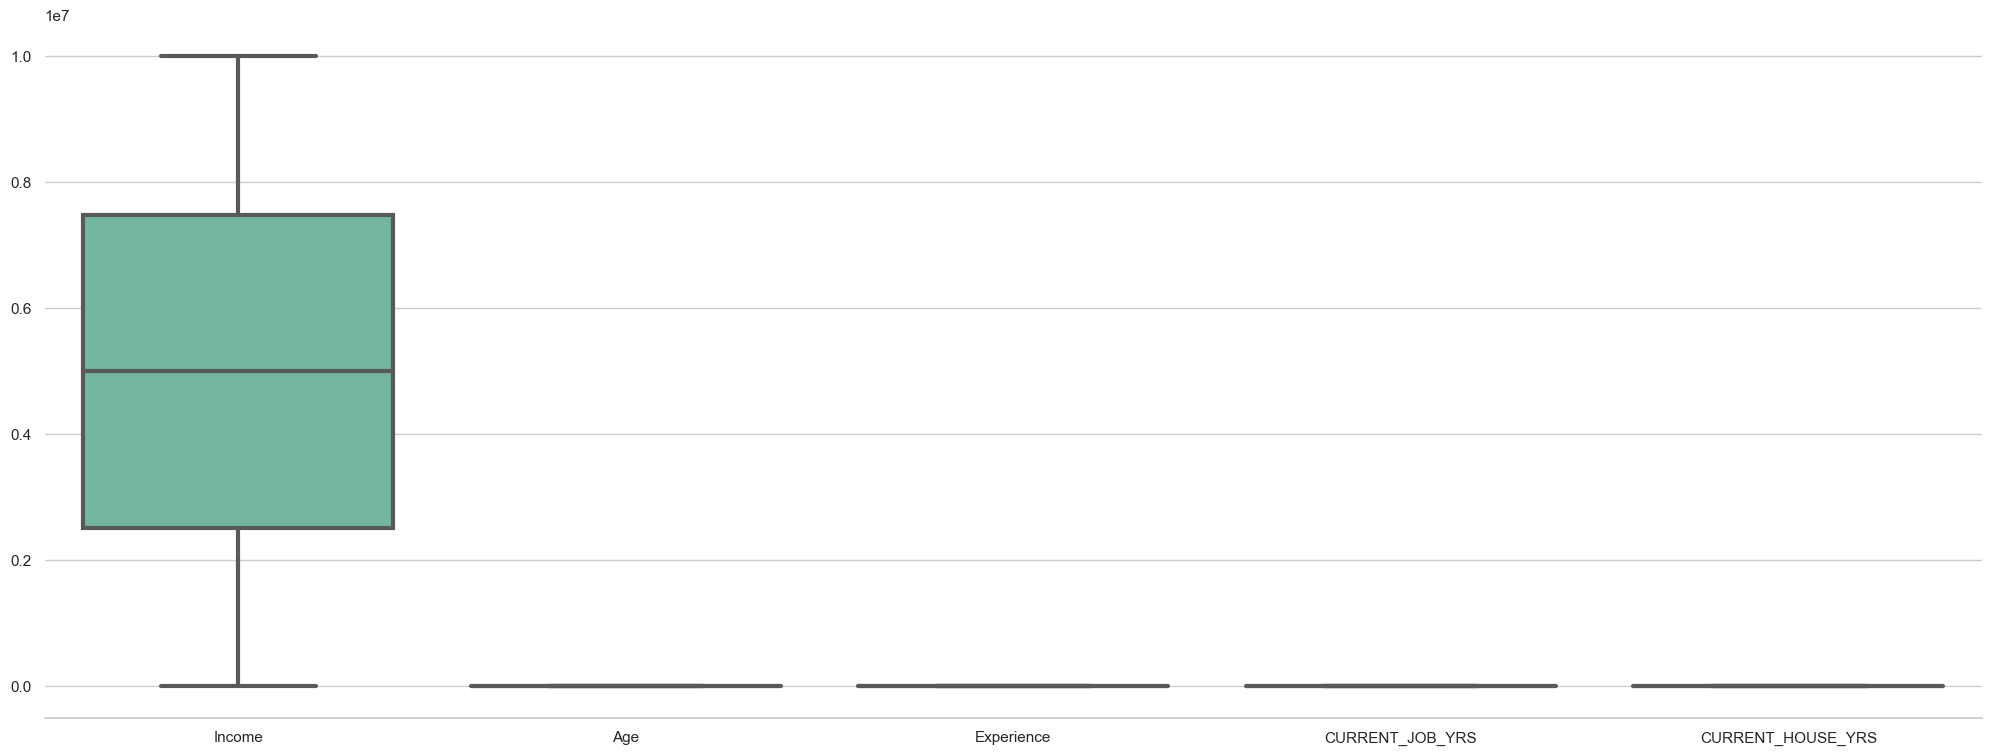

In [146]:
#Grafico de cajas para entender como se distribuyen los valores
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data =  pd.DataFrame(loan[num]), linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Como se esperaba, se hace necesario normalizar las variables para así mismo analizar si se pueden observar valores atípicos en su distribución.

In [147]:
#Normalizacion del dataset
scaler = MinMaxScaler()
loan[num] = scaler.fit_transform(loan[num])
loan[num].head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.15,0.214286,0.75
1,0.757206,0.327586,0.50,0.642857,0.75
2,0.398564,0.775862,0.20,0.285714,0.00
3,0.625263,0.344828,0.10,0.142857,0.50
4,0.576454,0.448276,0.55,0.214286,1.00


In [148]:
loan[num].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.452420,0.499448
std,0.288130,0.294204,0.300129,0.260504,0.349759
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,0.214286,0.250000
50%,0.499557,0.500000,0.500000,0.428571,0.500000
75%,0.747495,0.758621,0.750000,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Despues de la normalizacion graficamos nuevamente con un grafico de cajas para observar su distribusion y analizar si existen valores atipicos para eliminarlos.

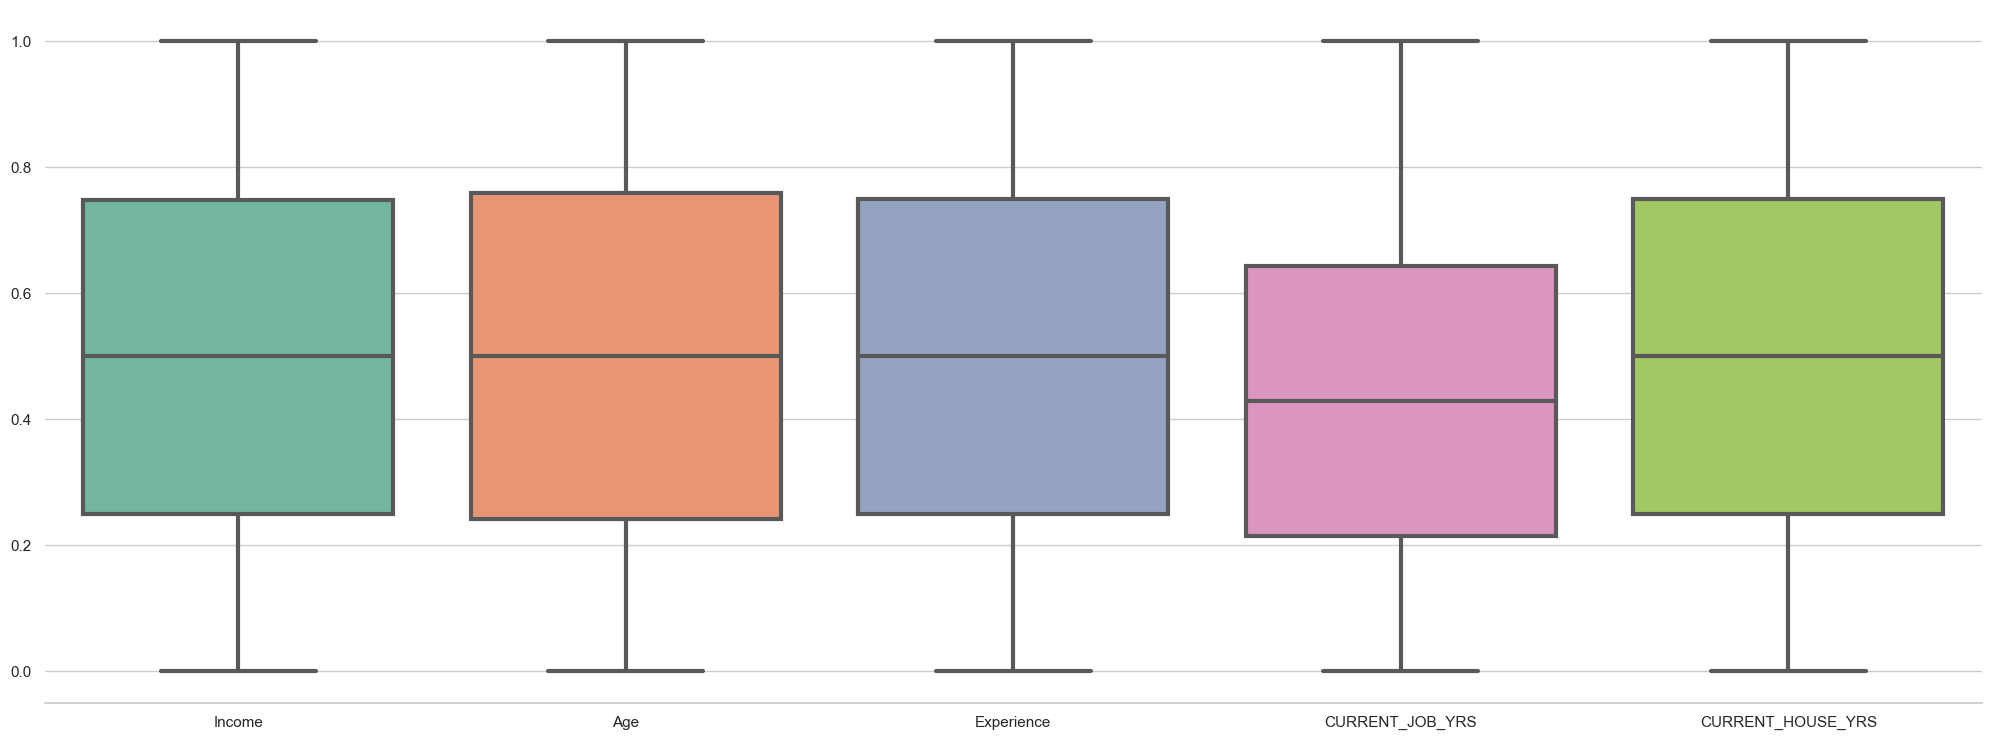

In [149]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = pd.DataFrame(loan[num]), linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Se observa que no existe presencia de valores atípicos, procederemos a graficar la relación entre estas variables.

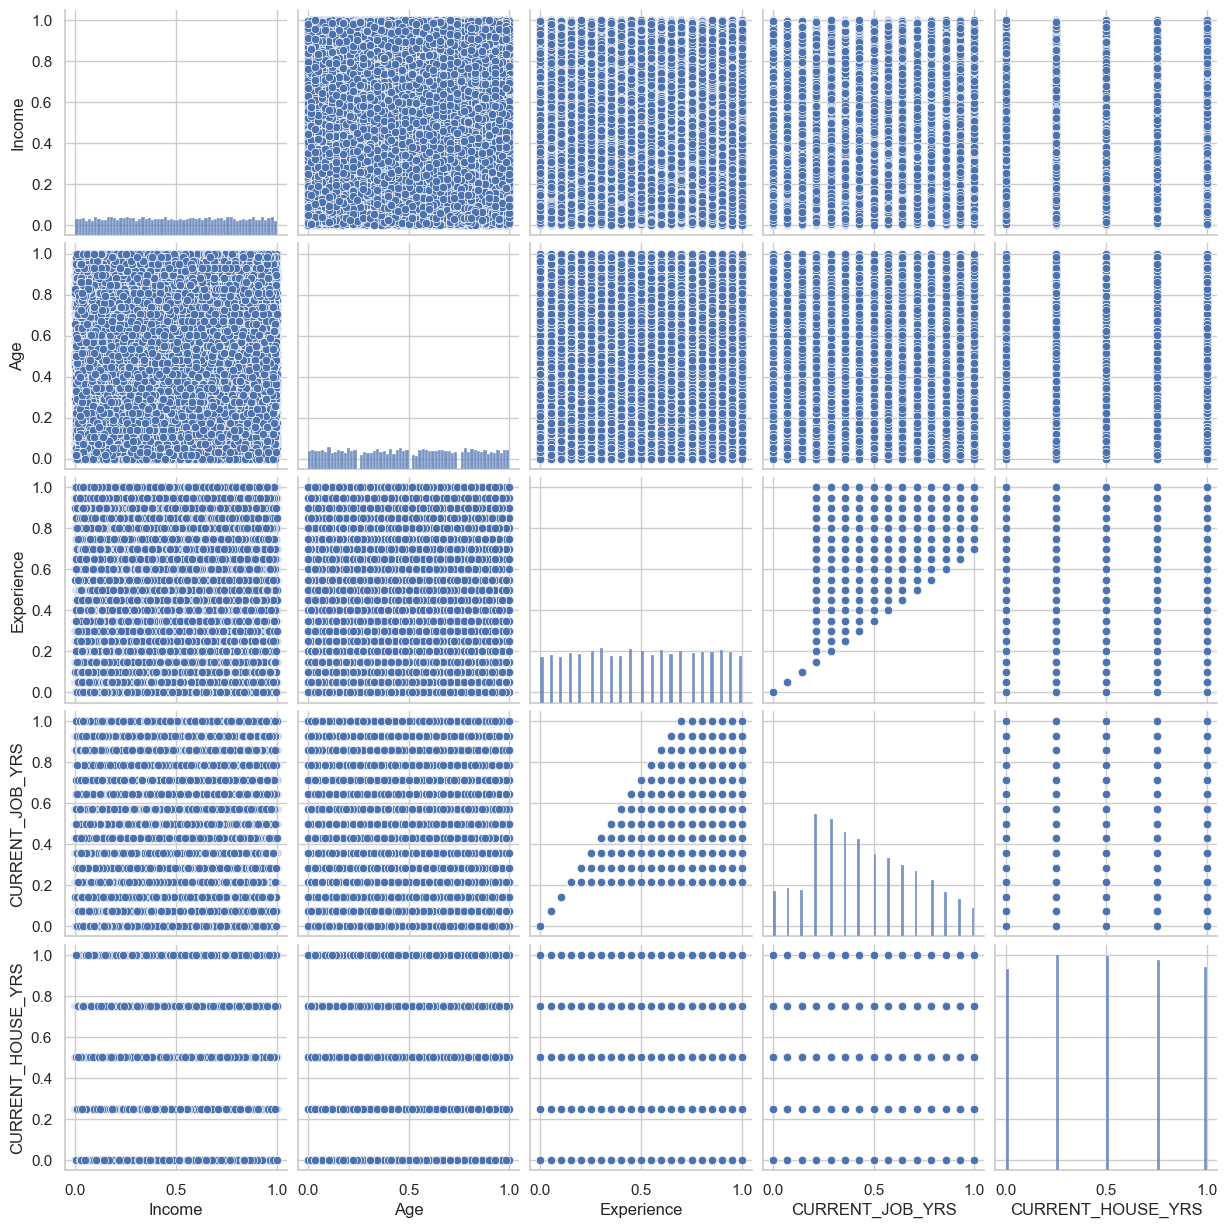

In [150]:
sns.pairplot(loan[num])#Se crea un grafico donde se observe la relacion entre las variables numericas sin la varibale de salida

Ahora analizaremos, la relación de las variables numéricas con la variable de salida a través de una matriz de correlación. Se espera ver si existe alguna variable tiene correlación alta con otra para considerar si se descarta o no.

In [151]:
labels = loan[num].columns
num.append('Risk_Flag')#Para crear la matriz de correlacion añadimos nuevamente la variable de salida al listado de variables numericas

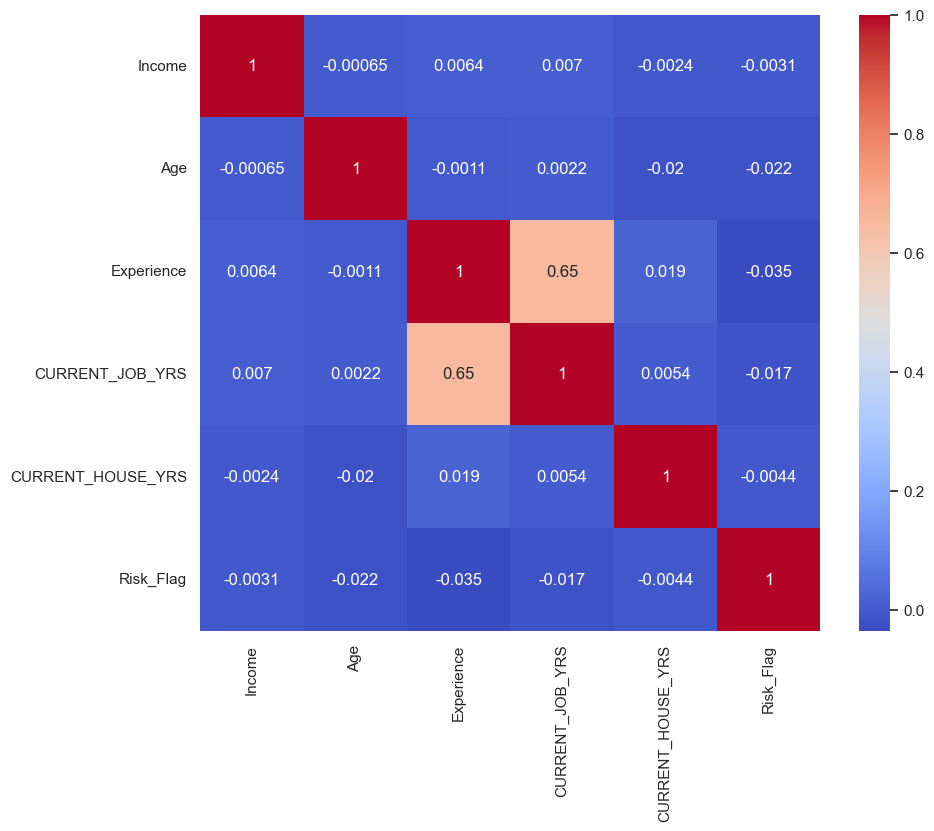

In [152]:
#Matriz de correlacion

cor = loan[num].corr()
label = loan[num].columns
# plt.figure(figsize=(10, 5))
# plt.matshow(cor, cmap='coolwarm')
# plt.xticks(range(len(label)), label)
# plt.yticks(range(len(label)), label)
# plt.colorbar()
# plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, xticklabels=label, yticklabels=label, cmap='coolwarm', annot=True)
plt.show()

Se observa una correlacion alta entre las variables experience y current job years, se considerara eliminar la variable experience.

## Limpieza y Preparacion de Datos

En esta limpieza y preparación de datos se eliminarán las variables previamente mencionadas en la visualización de datos, adicional, se verificará la presencia de valores nulos o inexistentes para posteriormente aplicar algún método de imputación.


In [153]:
loan = loan.drop(columns = ['CITY','Experience'])
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252000 non-null  float64
 1   Age                252000 non-null  float64
 2   Married/Single     252000 non-null  object 
 3   House_Ownership    252000 non-null  object 
 4   Car_Ownership      252000 non-null  object 
 5   Profession         252000 non-null  object 
 6   STATE              252000 non-null  object 
 7   CURRENT_JOB_YRS    252000 non-null  float64
 8   CURRENT_HOUSE_YRS  252000 non-null  float64
 9   Risk_Flag          252000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 19.2+ MB


In [154]:
loan.isnull().sum()#comprobacion de nulos en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [155]:
loan.isna().sum()#comprobacion de datos inexistentes en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Se eliminaron las variables City y Experience. Así mismo en la verificación de valores nulos o que no existen, no hay. Vemos que es un dataset muy limpio en este sentido. Igual se realzará un conteo de valores por variable para terminar de verificar que no existan valores diferentes.

In [156]:
#Para cada una de las caracteristica, oservamos la distribucion de las variables en numero
for v in loan:
  print("\nVariable: ", v)
  print(loan[v].value_counts())


Variable:  Income
Income
0.793394    77
0.977520    71
0.198838    71
0.934484    70
0.187801    40
            ..
0.892628     1
0.565245     1
0.816990     1
0.315779     1
0.906933     1
Name: count, Length: 41920, dtype: int64

Variable:  Age
Age
0.103448    5197
0.775862    5092
0.465517    4967
0.206897    4921
0.344828    4827
0.413793    4806
0.568966    4785
0.810345    4772
0.241379    4643
0.500000    4624
0.827586    4617
0.948276    4585
0.586207    4563
0.068966    4543
0.879310    4533
1.000000    4505
0.672414    4504
0.655172    4498
0.551724    4490
0.448276    4483
0.155172    4468
0.982759    4455
0.017241    4430
0.224138    4414
0.620690    4394
0.637931    4368
0.603448    4344
0.051724    4326
0.034483    4322
0.706897    4311
0.172414    4257
0.844828    4251
0.689655    4235
0.327586    4233
0.379310    4206
0.000000    4205
0.482759    4203
0.086207    4156
0.275862    4153
0.862069    4150
0.362069    4134
0.741379    4132
0.137931    4109
0.793103    3995


En definitiva, es un dataset muy limpio, ya que no tiene valores nulos, nan, o incluso en la visualización de datos no se encontraron valores atípicos. Se continuara con la creacion de valoriables dummies para la modelacion.

## Creacion de Variables Dummies


In [157]:
dum =pd.get_dummies(loan, drop_first=1)

In [158]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 87 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Income                                 252000 non-null  float64
 1   Age                                    252000 non-null  float64
 2   CURRENT_JOB_YRS                        252000 non-null  float64
 3   CURRENT_HOUSE_YRS                      252000 non-null  float64
 4   Risk_Flag                              252000 non-null  int64  
 5   Married/Single_single                  252000 non-null  bool   
 6   House_Ownership_owned                  252000 non-null  bool   
 7   House_Ownership_rented                 252000 non-null  bool   
 8   Car_Ownership_yes                      252000 non-null  bool   
 9   Profession_Analyst                     252000 non-null  bool   
 10  Profession_Architect                   252000 non-null  

Después de la creación de variables dmmies, a los valores de la variable de salida se le cambian su representación para que sea tomada como categórica. Los datos que toman el valor de 1 serán igual a Defaulter y los datos que toman el valor de 0 será igual a Not Defaulter.

In [159]:
dum["Risk_Flag"].replace(1,'Defaulter',inplace=True)
dum["Risk_Flag"].replace(0,'Not Defaulter',inplace=True)
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 87 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Income                                 252000 non-null  float64
 1   Age                                    252000 non-null  float64
 2   CURRENT_JOB_YRS                        252000 non-null  float64
 3   CURRENT_HOUSE_YRS                      252000 non-null  float64
 4   Risk_Flag                              252000 non-null  object 
 5   Married/Single_single                  252000 non-null  bool   
 6   House_Ownership_owned                  252000 non-null  bool   
 7   House_Ownership_rented                 252000 non-null  bool   
 8   Car_Ownership_yes                      252000 non-null  bool   
 9   Profession_Analyst                     252000 non-null  bool   
 10  Profession_Architect                   252000 non-null  

In [160]:
dum.groupby('Risk_Flag').Risk_Flag.count().sort_values(ascending=False)

Risk_Flag
Not Defaulter    221004
Defaulter         30996
Name: Risk_Flag, dtype: int64

Después de la creación de variables dummis, el datset pasa de tener 10 variables a 87. Con este dataset será con el que se empiece a realizar la aplicación de modelos.

## Entrenamiento de Modelos


El objetivo de este trabajo es encontrar la probabilidad de que un cliente sea moroso o no, para esto los modelos que aplicaremos serán de clasificación.

### Regresion Logistica

El primer modelo que será entrenado es el de regresión logística.

#### Division de datos

Los datos primero serán repartidos, entre los imput, representados por x, y el output, representado por y, que para nuestro caso, es la variable de salida "Risk_Flag".

In [161]:
colum = list(dum.columns)
colum.remove('Risk_Flag')
print(colum)

['Income', 'Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married/Single_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes', 'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer', 'Profession_Artist', 'Profession_Aviator', 'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant', 'Profession_Chef', 'Profession_Chemical_engineer', 'Profession_Civil_engineer', 'Profession_Civil_servant', 'Profession_Comedian', 'Profession_Computer_hardware_engineer', 'Profession_Computer_operator', 'Profession_Consultant', 'Profession_Dentist', 'Profession_Design_Engineer', 'Profession_Designer', 'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer', 'Profession_Fashion_Designer', 'Profession_Financial_Analyst', 'Profession_Firefighter', 'Profession_Flight_attendant', 'Profession_Geologist', 'Profession_Graphic_Designer', 'Profession_Hotel_Manager', 'Profession_Industrial_Engineer', 'Profession_Lawyer', 'Profession_Librarian', 'Prof

In [162]:
x = dum[colum]
y = dum['Risk_Flag']

El entrenamiento del modelo se realizara con el 80% de de training.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#### Creacion del modelo y entrenamiento del modelo

Se crearan 3 modelos con los parametros: Multi_class = (ovr, multinomial) y solver = (liblinear, lbfgs)

In [164]:
#Creación del modelo 

modelLRovrLinea       = LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0)
modelLRovrlbfgs       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0) 
modelLRMullbfgs       = LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0)



#Entrenamiento del modelo

modelLRovrLinea.fit(X_train, y_train)
modelLRovrlbfgs.fit(X_train, y_train)
modelLRMullbfgs.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### Acurrancy

Se almacenarán las predicciones de cada uno de los modelos para después compararlos con y_test a través del acurrancy, y se tomara el modelo con mayor puntaje.

In [165]:
y_predovrLinea = modelLRovrLinea.predict(X_test)
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)
y_predMullbfgs = modelLRMullbfgs.predict(X_test)

In [166]:
print("===========Accuracy Logistic Regression ================")
print("ovr - Linear       :",metrics.accuracy_score(y_test, y_predovrLinea))
print("ovr - lbfgs        :",metrics.accuracy_score(y_test, y_predovrlbfgs))
print("multinomial - lbfgs:",metrics.accuracy_score(y_test, y_predMullbfgs))

===========Accuracy Logistic Regression ================
ovr - Linear       : 0.8765873015873016
ovr - lbfgs        : 0.8765873015873016
multinomial - lbfgs: 0.8765873015873016


#### Matriz de Confusión

La matriz de confusión se realizará con los valores resultantes del modelo con los parámetros "ovr" y "lbfgs", se toman estos ya que son los más comunes y se ajustan al dataset, puesto que no es un gran dataset y su salida es binaria.

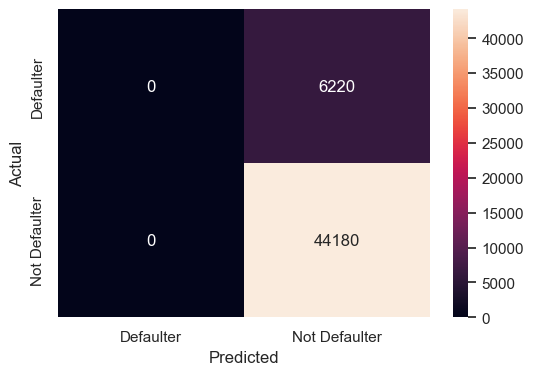

               precision    recall  f1-score   support

    Defaulter       0.00      0.00      0.00      6220
Not Defaulter       0.88      1.00      0.93     44180

     accuracy                           0.88     50400
    macro avg       0.44      0.50      0.47     50400
 weighted avg       0.77      0.88      0.82     50400



In [167]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test, y_predovrlbfgs)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum['Risk_Flag'].sort_values().unique()
            , yticklabels=dum['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_predovrlbfgs, target_names=dum['Risk_Flag'].sort_values().unique()))

In [168]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Curva ROC

In [169]:
#Convertir y_test Not Defaulter y Defaulter en 1 y 0

e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('Not Defaulter',1, inplace=True)
e_dataframe.replace('Defaulter', 0,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.43


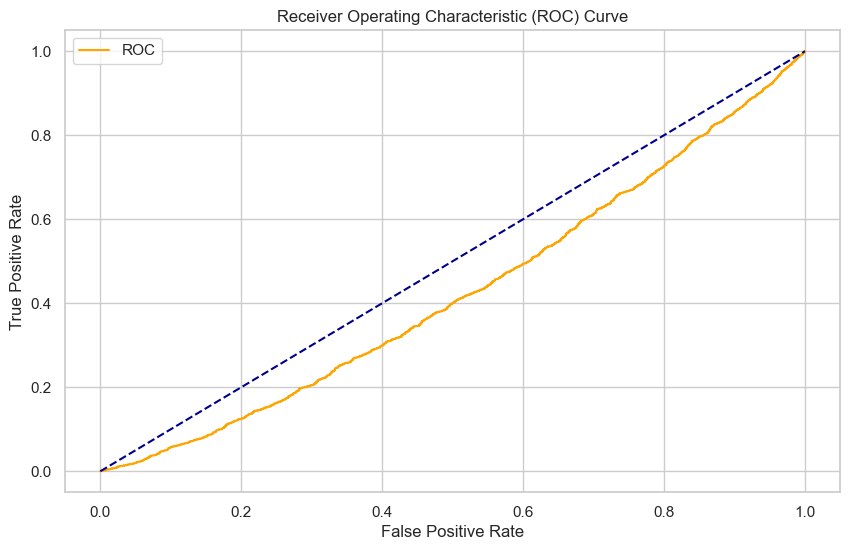

In [170]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fig = plt.figure(figsize=(10,6))


probs = modelLRovrLinea.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

Aunque se observa un accuracy del modelo del 88%, la precisión que muestra al predecir cada uno de los valores de la variable de salida no es lo deseado ya que no es capaz de identificar perfiles con la variable de salida igual a 1 o morosos.


### KNN

El segundo modelo que se entrenara será el de vecinos cercanos "KNN".

#### Division de Datos


In [171]:
x = dum[colum]
y = dum['Risk_Flag']

Al igual que en regresión logística, el entrenamiento se realizará con el 80% de los datos.

In [172]:
x_train, x_test, Y_train, Y_test = train_test_split(
                                        x,
                                        y, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#### Creacion y entrenamiento del modelo

Para la selección de vecinos, se realizará una validación cruzada con 2,5,7 y 10 para determinar cuál es el que arroja mejores métricas.

In [173]:

neighbors = [2,5,7, 10]
mean_scores = []
std_scores = []

for i in neighbors:
    # Crear el modelo
    model = KNeighborsClassifier(n_neighbors=i)
    
    # Realizar la validación cruzada con 5 folds
    scores = cross_val_score(model, x_train, Y_train, cv=5)
    
    # Calcular la media y la desviación estándar de los puntajes de evaluación
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    # Guardar los resultados de la iteración actual
    mean_scores.append(mean_score)
    std_scores.append(std_score)
    
    # Ajustar el modelo con los datos de entrenamiento
    model.fit(x_train, Y_train)
    
    # Evaluar el modelo con los datos de validación
    score = model.score(x_test, Y_test)
    print(f"K={i}, CrossVal mean score: {mean_score:.2f}, CrossVal std: {std_score:.2f}, Test score: {score:.2f}")

# Encontrar el mejor valor de i según la media de los puntajes de evaluación
best_k = neighbors[np.argmax(mean_scores)]
print(f"\nEl mejor valor de K es {best_k}")



K=2, CrossVal mean score: 0.87, CrossVal std: 0.00, Test score: 0.87
K=5, CrossVal mean score: 0.89, CrossVal std: 0.00, Test score: 0.89
K=7, CrossVal mean score: 0.89, CrossVal std: 0.00, Test score: 0.89
K=10, CrossVal mean score: 0.89, CrossVal std: 0.00, Test score: 0.89

El mejor valor de K es 7


En la validación, se determina que el modelo con mejor media es el que se realiza con 7 vecinos cercanos, así que este será el valor tomado para el entrenamiento.

In [174]:
#Creación del modelo 

modelKNN       = KNeighborsClassifier(n_neighbors=7)

modelKNN.fit(x_train, Y_train)


KNeighborsClassifier(n_neighbors=7)

#### Acurrancy

In [175]:
y_modelKNN = modelKNN.predict(x_test)

print("===========Accuracy KNN Gaussian NB ================")
print("modelKNN:",metrics.accuracy_score(Y_test, y_modelKNN))

===========Accuracy KNN Gaussian NB ================
modelKNN: 0.8916269841269842


Se observa que el acurrancy de este modelo sobre la data, es mayor al obtenido en el modelo de regresión logística. Se graficará una matriz de confusión junto con las métricas del modelo, lo que se espera es que la precisión en la predicción de cada uno de los valores de la variable de salida sea mejor.

#### Matriz de Confusión

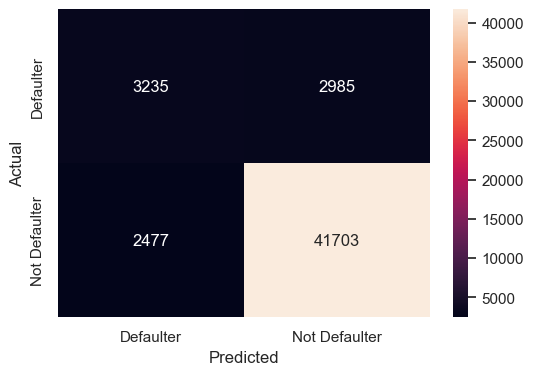

               precision    recall  f1-score   support

    Defaulter       0.57      0.52      0.54      6220
Not Defaulter       0.93      0.94      0.94     44180

     accuracy                           0.89     50400
    macro avg       0.75      0.73      0.74     50400
 weighted avg       0.89      0.89      0.89     50400



In [176]:
#Matriz de confusión

conf_mat = confusion_matrix(Y_test, y_modelKNN)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum['Risk_Flag'].sort_values().unique()
            , yticklabels=dum['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(Y_test, y_modelKNN, target_names=dum['Risk_Flag'].sort_values().unique()))

Como resultado, se obtiene que en la precisión mejora de forma considerable frente al modelo de regresión logística. Pasa de una precisión para "Defaulter" de 0% a 57% y para "Not Defaulter" de 88% a 93%.

#### Curva ROC

In [177]:
#Convertir y_test Defaulter y Not Defaulter en 1 y 0

e_dataframe_ = pd.DataFrame(Y_test)
e_dataframe_.replace('Defaulter',1, inplace=True)
e_dataframe_.replace('Not Defaulter', 0,inplace=True)
arr_ = e_dataframe_.to_numpy()

AUC: 0.88


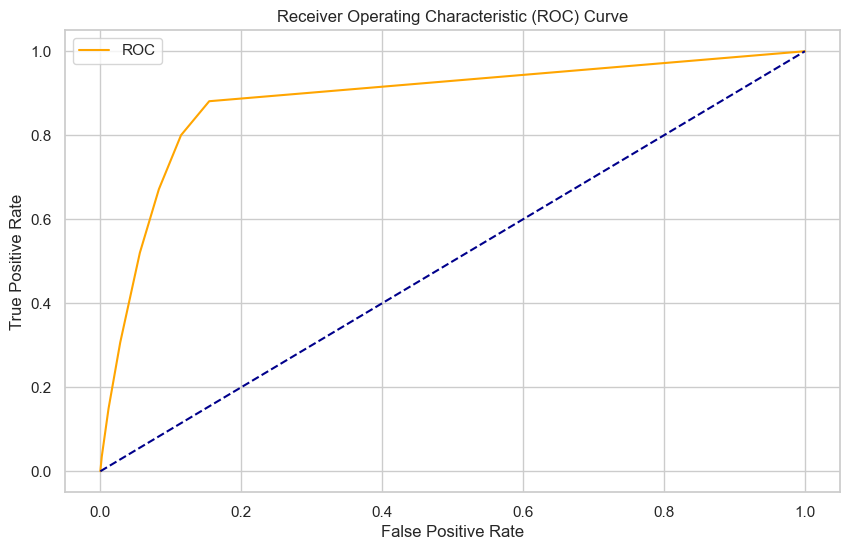

In [178]:
fig = plt.figure(figsize=(10,6))


probs = modelKNN.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(arr_, probs*(-1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr_, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

Frente al modelo de regresión logística muestra mejores métricas con un accurancy de 89% frente a un 88% y un AUC de 0.43 a 0.89.

### Random Forest Clasificacion

El siguiente modelo a implementar será Arboles de decisión o Random Forest Clasification

##### Division de datos

In [179]:
x_ = dum[colum]
y = dum['Risk_Flag']

Al igual que en el entrenamiento de los modelos anteriores, este se realizará con el 80% de los datos.

In [180]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(
                                        x,
                                        y, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#### Creacion y entrenamiento del modelo

Se aplicará grid search, para la selección de los hiperparametros que arrojen las mejores métricas para el entrenamiento del modelo.

##### Grid Search basado en out-of-bag score

In [181]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train_rf, y_train_rf)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head()

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
13,0.899499,entropy,NaN,7,150
14,0.899454,entropy,NaN,9,150
1,0.899400,gini,NaN,7,150
2,0.899380,gini,NaN,9,150
12,0.899315,entropy,NaN,5,150


In [182]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.8994990079365079 : 0.8994990079365079 accuracy


Se realizará un grid search basado en validación cruzada, se examinará entre las dos evaluaciones para elegir los mejores hiper parámetros y entrenar el modelo.

##### Grid Search basado en validación cruzada

In [183]:
# # Grid de hiperparámetros evaluados
# # ==============================================================================
# param_grid = {'n_estimators': [150],
#               'max_features': [5, 7, 9],
#               'max_depth'   : [None, 3, 10, 20],
#               'criterion'   : ['gini', 'entropy']
#              }

# # Búsqueda por grid search con validación cruzada
# # ==============================================================================
# grid = GridSearchCV(
#         estimator  = RandomForestClassifier(random_state = 123),
#         param_grid = param_grid,
#         scoring    = 'accuracy',
#         n_jobs     = multiprocessing.cpu_count() - 1,
#         cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
#         refit      = True,
#         verbose    = 0,
#         return_train_score = True
#        )

# grid.fit(x_train_rf, y_train_rf)

# # Resultados
# # ==============================================================================
# resultados = pd.DataFrame(grid.cv_results_)
# resultados.filter(regex = '(param*|mean_t|std_t)') \
#     .drop(columns = 'params') \
#     .sort_values('mean_test_score', ascending = False) \
#     .head(4)

In [184]:
# # Mejores hiperparámetros por validación cruzada
# # ==============================================================================
# print("----------------------------------------")
# print("Mejores hiperparámetros encontrados (cv)")
# print("----------------------------------------")
# print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Se seleccionará las métricas obtenidas por la evaluación por validación cruzada, estas se almacenarán como modelo final y se dejara esta parte como comentario, ya que, para la ejecución del código, toma poco más de una hora para ejecutarlo.

In [185]:
modelo_final =RandomForestClassifier(criterion='entropy',max_depth=None,max_features=9,n_estimators=150)
modelo_final.fit(x_train_rf, y_train_rf)

RandomForestClassifier(criterion='entropy', max_features=9, n_estimators=150)

In [186]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X = x_test_rf)
predicciones[:10]

array(['Not Defaulter', 'Not Defaulter', 'Not Defaulter', 'Not Defaulter',
       'Not Defaulter', 'Not Defaulter', 'Not Defaulter', 'Not Defaulter',
       'Not Defaulter', 'Not Defaulter'], dtype=object)

#### Matriz de Confusion

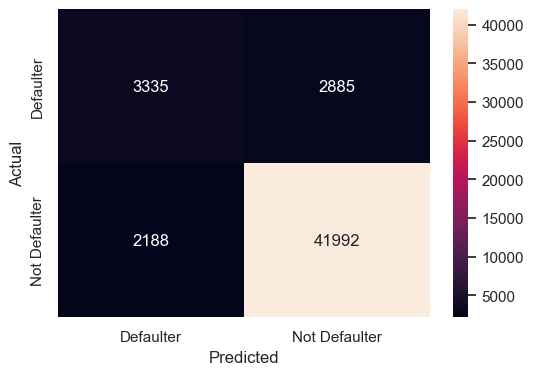

               precision    recall  f1-score   support

    Defaulter       0.60      0.54      0.57      6220
Not Defaulter       0.94      0.95      0.94     44180

     accuracy                           0.90     50400
    macro avg       0.77      0.74      0.76     50400
 weighted avg       0.89      0.90      0.90     50400



In [187]:
# Matriz de confusión

conf_mat = confusion_matrix(y_test_rf, predicciones)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum['Risk_Flag'].sort_values().unique()
            , yticklabels=dum['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_rf, predicciones, target_names=dum['Risk_Flag'].sort_values().unique()))

Frente a los modelos anteriores se tienen mejore métricas, un accurancy de 90% y precisiones de 61% para "Defaulter" y 94% para "Not Defaulter".

#### Curva ROC

In [188]:
#Convertir y_test Defaulter y Not Defaulter en 1 y 0

e_dataframe_rf = pd.DataFrame(y_test_rf)
e_dataframe_rf.replace('Defaulter',1, inplace=True)
e_dataframe_rf.replace('Not Defaulter', 0,inplace=True)
arr_rf = e_dataframe_rf.to_numpy()

AUC: 0.94


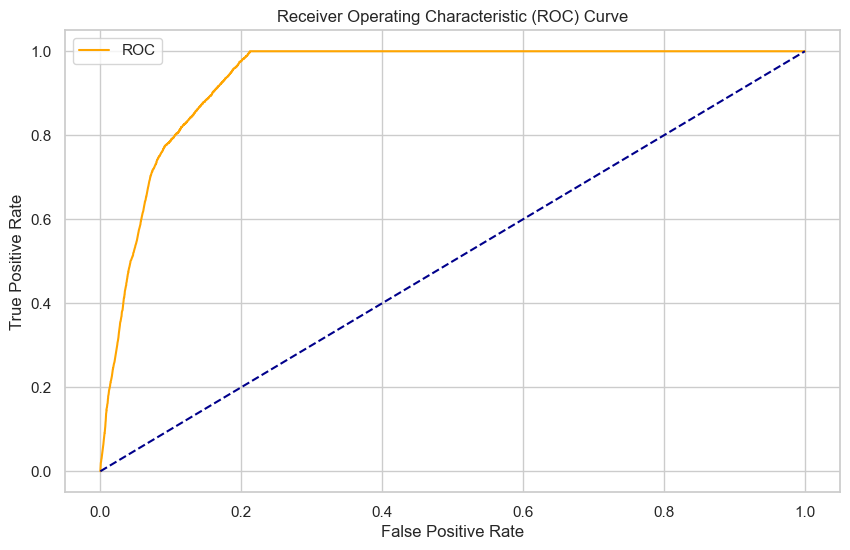

In [189]:
fig = plt.figure(figsize=(10,6))


probs = modelo_final.predict_proba(x_test_rf)
probs = probs[:, 1]
auc_rf = roc_auc_score(arr_rf, probs*(-1))

print('AUC: %.2f' % auc_rf)
fpr, tpr, thresholds = roc_curve(arr_rf, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

De los tres modelos entrenados, el que cuenta con mejores métricas es el de Random Forest.


## Torneo de Modelos.

Se realizará un torneo de modelos donde se evaluarán los tres modelos entrenados previamente, tomando los hiperparametros con mejores métricas. Estos se evaluarán con la data de test que se encuentra cargada en kanggel, esto es una data con la que ninguno de los modelos fue entrenado, por lo que el modelo con mejor accurancy al final sería el seleccionado para aplicar a solucionar el objetivo de este trabajo.

### Cargue de la data test.

El dataset que se tomara como test, también se encuentra en la página de Kaggel del dataset de entrenamiento: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Test+Data.csv. Este se encuentra sin la variable de salida, por lo que se concatenara con otro dataset, ubicado en la misma dirección, que contiene las variables de salida del dataset test.

In [190]:
loan_test_1 = pd.read_csv(r"D:\Usuario Carolina\Documents\Especializacion\Monografia\Loan_Behavior\Data\Test Data.csv")
loan_test_2 = pd.read_csv(r"D:\Usuario Carolina\Documents\Especializacion\Monografia\Loan_Behavior\Data\Training Data.csv")
loan_test = pd.concat([loan_test_1, loan_test_2["risk_flag"]], axis=1)
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
 12  risk_flag          28000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.8+ MB


Para la evaluación, se preparará la data para realizar las pruebas. Se verificará la existencia de datos atípicos, se eliminarán las columnas que se eliminaron para entrenar los modelos y se verificara la presencia de valores nulos o faltantes.

In [191]:
# Eliminacion de columnas ID, CITY y Experience

loan_test = loan_test.drop(columns = ['ID','CITY','Experience'])
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             28000 non-null  int64 
 1   Age                28000 non-null  int64 
 2   Married/Single     28000 non-null  object
 3   House_Ownership    28000 non-null  object
 4   Car_Ownership      28000 non-null  object
 5   Profession         28000 non-null  object
 6   STATE              28000 non-null  object
 7   CURRENT_JOB_YRS    28000 non-null  int64 
 8   CURRENT_HOUSE_YRS  28000 non-null  int64 
 9   risk_flag          28000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.1+ MB


In [192]:
# Verificacion de presencia de datos nulos o faltantes

for j in loan_test:
  print("\nVariable: ", j)
  print(loan_test[j].value_counts())


Variable:  Income
Income
4254644    13
5294136    11
6619894    11
3846207    11
30515      11
           ..
4790352     1
4034180     1
2077117     1
2535282     1
9474180     1
Name: count, Length: 9916, dtype: int64

Variable:  Age
Age
27    605
33    566
66    553
54    545
79    540
69    537
72    537
41    536
48    534
45    528
22    527
61    524
35    522
34    513
50    509
23    508
59    508
55    507
47    506
76    506
68    506
78    504
60    496
25    491
64    485
56    478
49    473
43    471
62    463
30    463
57    463
40    462
21    462
77    461
37    461
53    457
74    455
28    454
67    453
26    453
24    451
58    448
71    446
63    444
42    442
73    433
70    432
39    431
46    429
38    429
65    423
32    420
31    419
29    419
75    405
44    398
51    388
36    378
52    343
Name: count, dtype: int64

Variable:  Married/Single
Married/Single
single     25170
married     2830
Name: count, dtype: int64

Variable:  House_Ownership
House_Ownershi

In [193]:
loan_test.isnull().sum()#comprobacion de nulos en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
risk_flag            0
dtype: int64

In [194]:
loan_test.isna().sum()#comprobacion de datos inexistentes en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
risk_flag            0
dtype: int64

Se observaran las frecuencias de las variables categóricas para descartar la presencia de valores atípicos.


In [195]:
#Seleccion de variables categoricas
cat_test=loan_test.select_dtypes(include = ["object"]).columns.tolist()
loan_test[cat_test].head()

,Married/Single,House_Ownership,Car_Ownership,Profession,STATE
0,single,rented,no,Geologist,West Bengal
1,single,rented,no,Firefighter,Maharashtra
2,single,rented,no,Lawyer,Maharashtra
3,married,rented,yes,Analyst,Maharashtra
4,single,rented,yes,Comedian,West Bengal


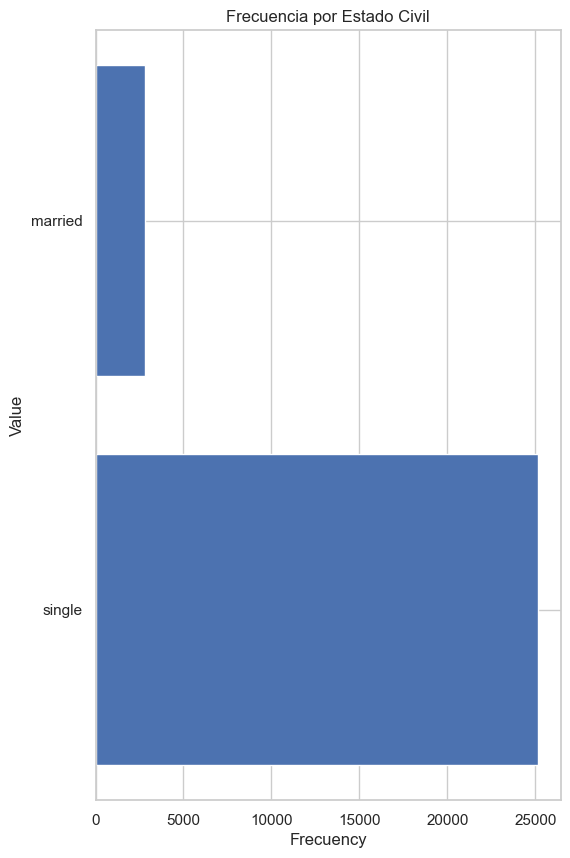

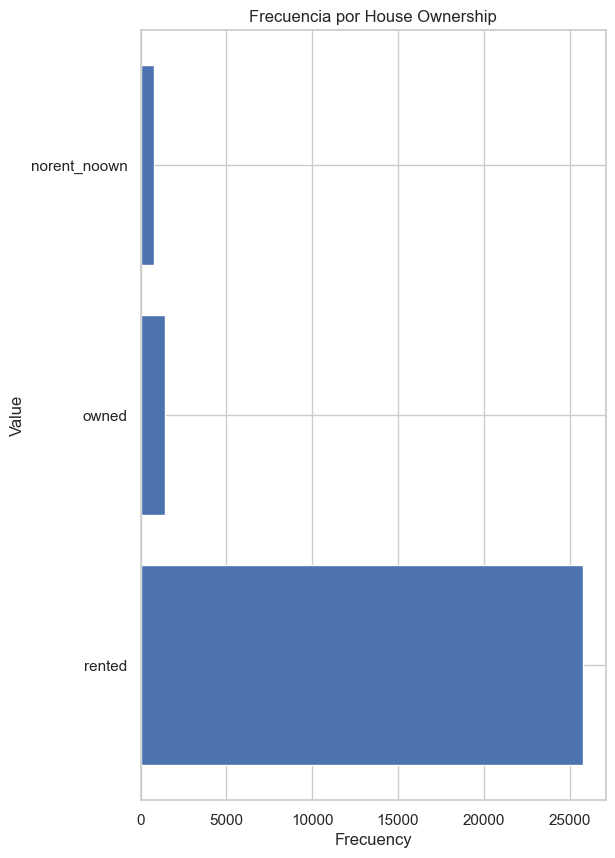

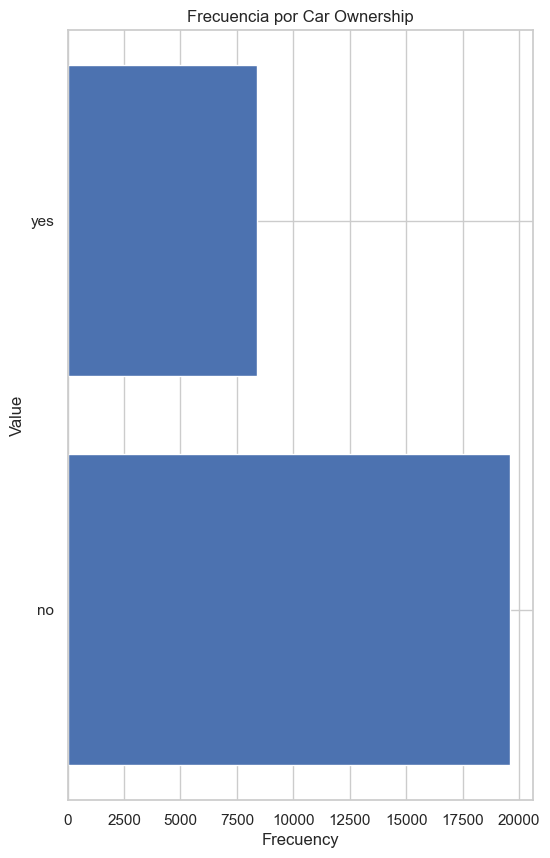

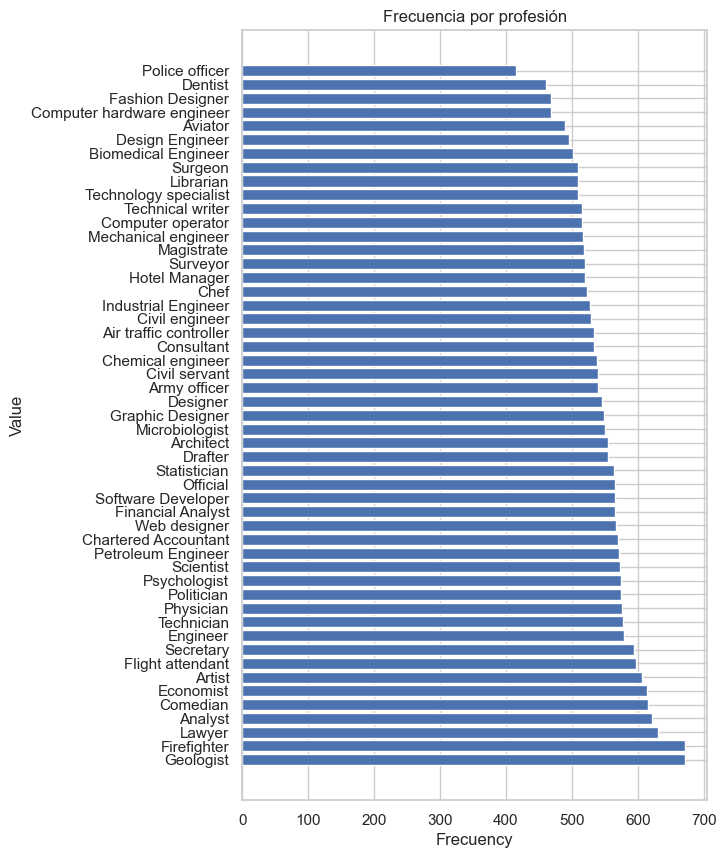

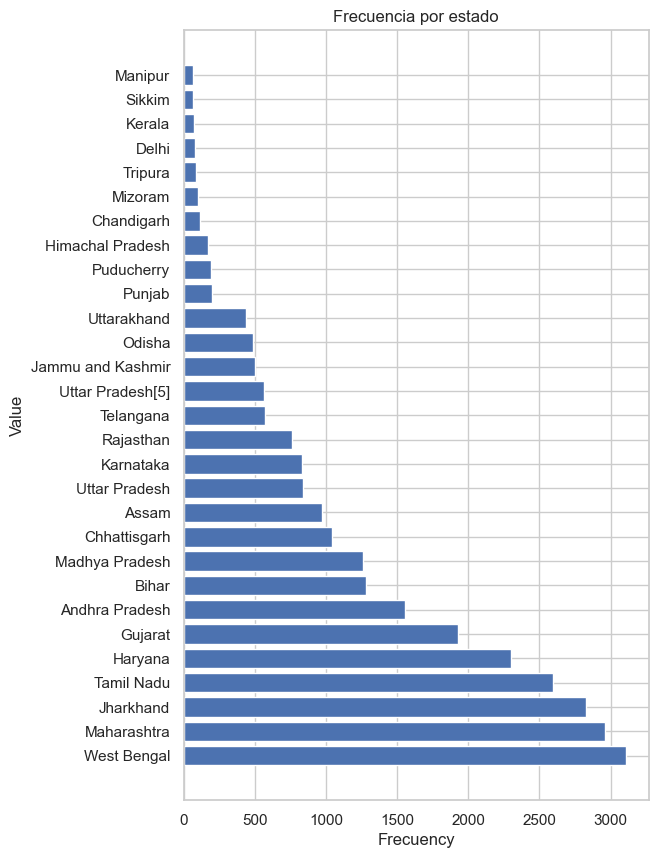

In [196]:
#Grafico de frecuencia de las varibables categoricas
variables_test = [loan_test["Married/Single"], loan_test["House_Ownership"],loan_test["Car_Ownership"],loan_test["Profession"], loan_test["STATE"]]
titles_test = ["Frecuencia por Estado Civil", "Frecuencia por House Ownership","Frecuencia por Car Ownership","Frecuencia por profesión", "Frecuencia por estado"]

for var, title in zip(variables_test, titles_test):
    labels = var.unique().tolist()
    values = var.value_counts().tolist()

    fig, ax = plt.subplots(figsize=(6, 10))
    ax.barh(labels, values)

    # Etiquetas y título
    ax.set_xlabel("Frecuency")
    ax.set_ylabel("Value")
    ax.set_title(title)

    plt.show()

No se encontró ninguna irregularidad en las variables categórica, se para a observar las distribuciones de las variables numéricas, y en caso de requerirse, normalizarlas.

In [197]:
#Seleccionar las variables de tipo int64 se extraen de la base para observacion
num_test=loan_test.select_dtypes(include = ["Int64"]).columns.tolist()
loan_test[num_test].head()

,Income,Age,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,risk_flag
0,7393090,59,4,13,0
1,1215004,25,5,10,0
2,8901342,50,9,14,1
3,1944421,49,3,12,0
4,13429,25,13,11,0


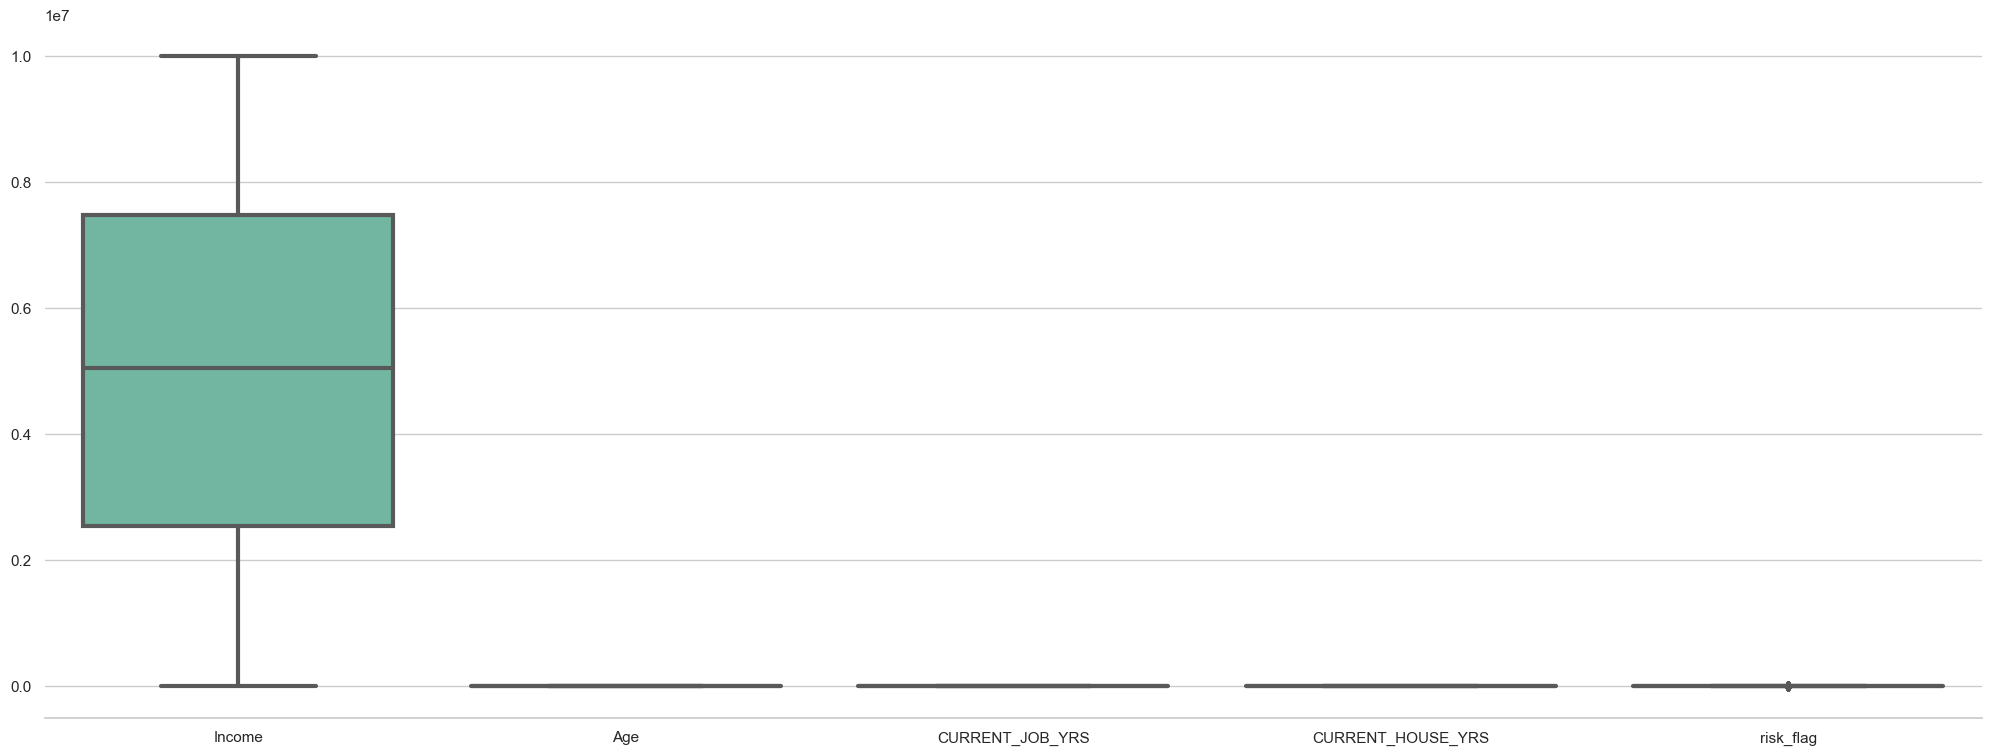

In [198]:
#Grafico de cajas para entender como se distribuyen los valores
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data =  pd.DataFrame(loan_test[num_test]), linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [199]:
#Normalizacion del dataset
scaler = MinMaxScaler()
loan_test[num_test] = scaler.fit_transform(loan_test[num_test])
loan_test[num_test].head()

,Income,Age,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,risk_flag
0,0.739054,0.655172,0.285714,0.75,0.0
1,0.120596,0.068966,0.357143,0.00,0.0
2,0.890037,0.500000,0.642857,1.00,1.0
3,0.193614,0.482759,0.214286,0.50,0.0
4,0.000312,0.068966,0.928571,0.25,0.0


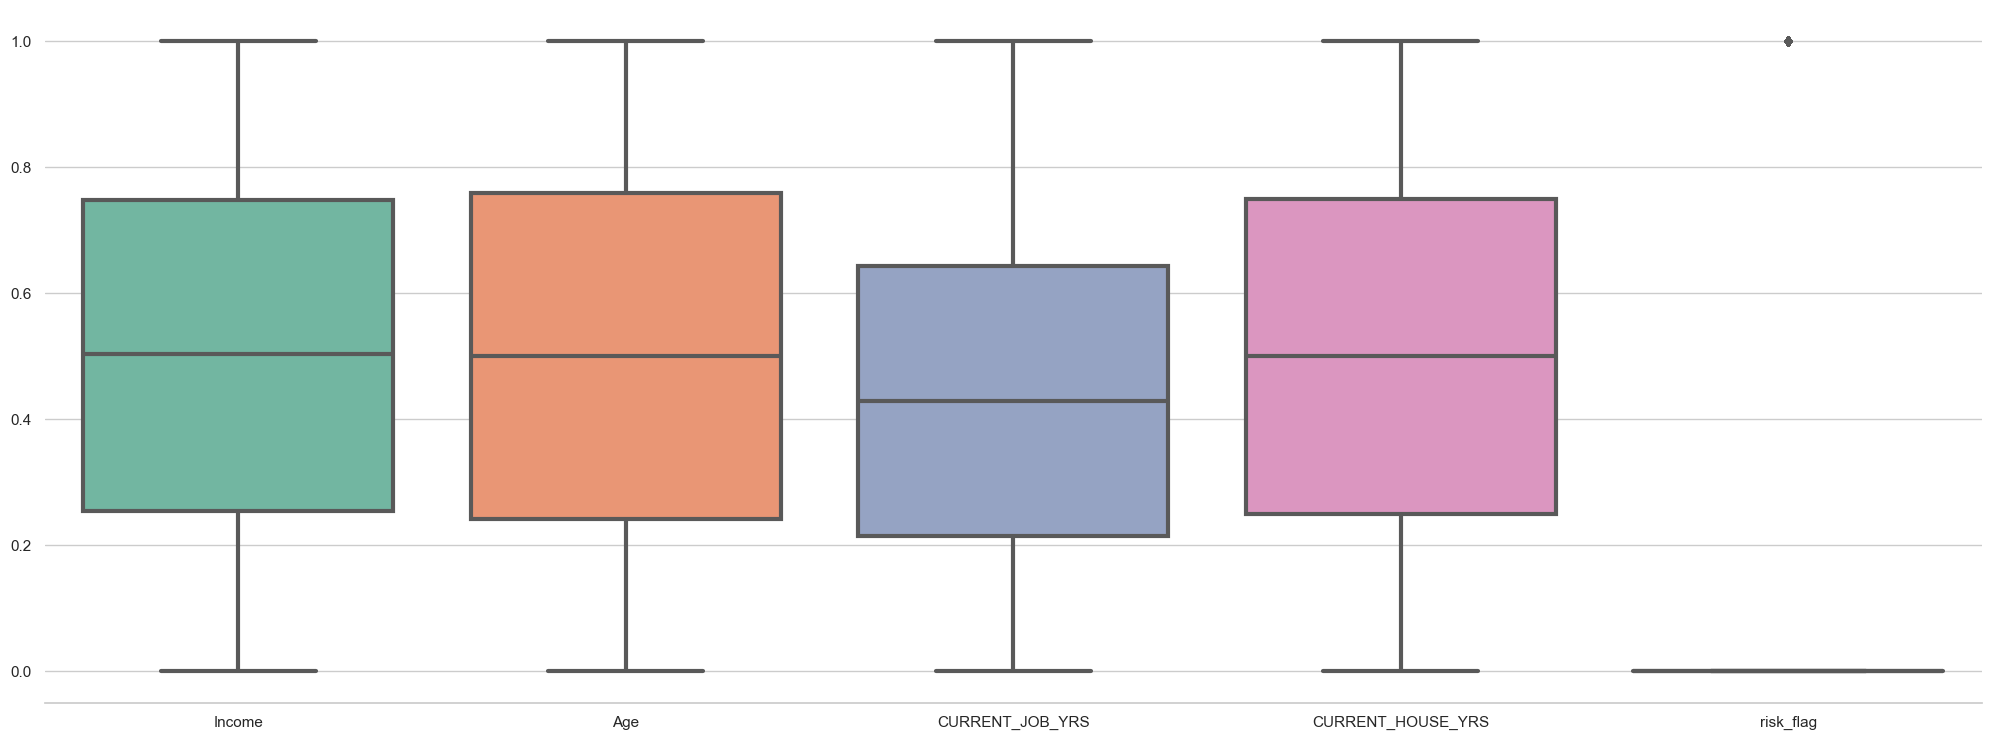

In [200]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = pd.DataFrame(loan_test[num_test]), linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Después de evaluar las variables numéricas y de normalizarlas, se procederá a crear las variables dummies para el dataset de prueba.

In [201]:
# Creacion de Dummies
dum_test =pd.get_dummies(loan_test, drop_first=1)
dum_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Income                                 28000 non-null  float64
 1   Age                                    28000 non-null  float64
 2   CURRENT_JOB_YRS                        28000 non-null  float64
 3   CURRENT_HOUSE_YRS                      28000 non-null  float64
 4   risk_flag                              28000 non-null  float64
 5   Married/Single_single                  28000 non-null  bool   
 6   House_Ownership_owned                  28000 non-null  bool   
 7   House_Ownership_rented                 28000 non-null  bool   
 8   Car_Ownership_yes                      28000 non-null  bool   
 9   Profession_Analyst                     28000 non-null  bool   
 10  Profession_Architect                   28000 non-null  bool   
 11  Pr

Se cambiará la variable de salida para que sea de tipo 'Object' y no 'Float64'.

In [202]:
dum_test["risk_flag"].replace(1,'Defaulter',inplace=True)
dum_test["risk_flag"].replace(0,'Not Defaulter',inplace=True)
dum_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Income                                 28000 non-null  float64
 1   Age                                    28000 non-null  float64
 2   CURRENT_JOB_YRS                        28000 non-null  float64
 3   CURRENT_HOUSE_YRS                      28000 non-null  float64
 4   risk_flag                              28000 non-null  object 
 5   Married/Single_single                  28000 non-null  bool   
 6   House_Ownership_owned                  28000 non-null  bool   
 7   House_Ownership_rented                 28000 non-null  bool   
 8   Car_Ownership_yes                      28000 non-null  bool   
 9   Profession_Analyst                     28000 non-null  bool   
 10  Profession_Architect                   28000 non-null  bool   
 11  Pr


Para realizar las pruebas con los modelos ya entrenados, se hace necesario que las columnas del dataset de prueba se nombren igual que las columnas con el dataset de entrenamiento. Para mayor seguridad, se creara un diccionario con estos nombre y su equivalente y se reemplazaran los nombres de las columnas al dataset de prueba.


In [203]:
diccionario = dict(zip(dum_test.columns, dum.columns))
dum_test = dum_test.rename(columns=diccionario)
dum_test.head()

,Income,Age,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.739054,0.655172,0.285714,0.75,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.120596,0.068966,0.357143,0.00,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.890037,0.500000,0.642857,1.00,Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.193614,0.482759,0.214286,0.50,Not Defaulter,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,0.000312,0.068966,0.928571,0.25,Not Defaulter,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [204]:
# for i, J in zip(dum.columns, dum_test.columns):
for i in range(len(dum.columns)):
    if dum.columns[i] == dum_test.columns[i]:
        print(f"Elemento {i} coincide en ambas listas: {dum.columns[i]}")
    else:
        print(f"Elemento {i} no coincide en ambas listas: {dum.columns[i]}, {dum_test.columns[i]}")

Elemento 0 coincide en ambas listas: Income
Elemento 1 coincide en ambas listas: Age
Elemento 2 coincide en ambas listas: CURRENT_JOB_YRS
Elemento 3 coincide en ambas listas: CURRENT_HOUSE_YRS
Elemento 4 coincide en ambas listas: Risk_Flag
Elemento 5 coincide en ambas listas: Married/Single_single
Elemento 6 coincide en ambas listas: House_Ownership_owned
Elemento 7 coincide en ambas listas: House_Ownership_rented
Elemento 8 coincide en ambas listas: Car_Ownership_yes
Elemento 9 coincide en ambas listas: Profession_Analyst
Elemento 10 coincide en ambas listas: Profession_Architect
Elemento 11 coincide en ambas listas: Profession_Army_officer
Elemento 12 coincide en ambas listas: Profession_Artist
Elemento 13 coincide en ambas listas: Profession_Aviator
Elemento 14 coincide en ambas listas: Profession_Biomedical_Engineer
Elemento 15 coincide en ambas listas: Profession_Chartered_Accountant
Elemento 16 coincide en ambas listas: Profession_Chef
Elemento 17 coincide en ambas listas: Profes

Se finalizo comprobando que las columnas tuvieran los mismos nombres en los dos datasets, el de entrenamiento y el de prueba, siendo que todas se llaman igual se procederá a probar los modelos previamente entrenados.

### Prueba de los modelos.

Se iniciará separando la variable de salida de las demás variables, estas se nombrarán como x_t y serán con las que se realizara la función 'predict' para cada modelo. Se espera ver que tan buenas son las métricas en general de cada uno con data que no conoce. Al finalizar, se seleccionará el modelo con las mejores métricas.

In [205]:
x_t = dum_test[colum]
y_t = dum_test['Risk_Flag']

Se iniciará evaluando el modelo de regresión logística, este modelo al momento de evaluar el entrenamiento con la data test tuvo unas métricas no del todo buenas, por lo que se esperaría que al realizar predicciones con una data desconocida están no mejoren.

In [206]:
#Prediccion con Regresion Logistica
Y_T_rl= modelLRMullbfgs.predict(x_t)


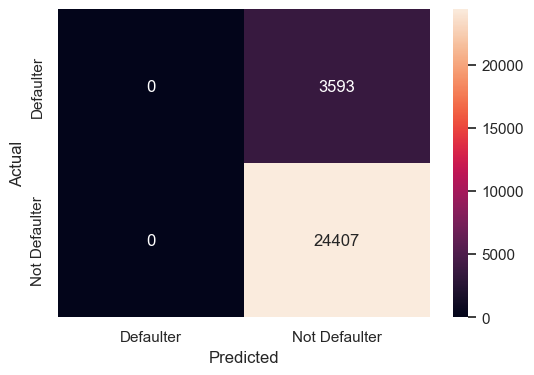

               precision    recall  f1-score   support

    Defaulter       0.00      0.00      0.00      3593
Not Defaulter       0.87      1.00      0.93     24407

     accuracy                           0.87     28000
    macro avg       0.44      0.50      0.47     28000
 weighted avg       0.76      0.87      0.81     28000



In [207]:
#Matriz de confusión de regresion logistica

conf_mat_rl = confusion_matrix(y_t, Y_T_rl)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_rl
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_t, Y_T_rl, target_names=dum_test['Risk_Flag'].sort_values().unique()))

Como se esperaba, las métricas son muy similares a las del modelo de entrenamiento. Una accurancy muy alto y unas precisiones muy altas para identificar "Not Defaulter", pero nula para identificar "Defaulter".

El siguiente modelo a evaluar es el de Vecinos Cercanos, este tuvo mejores métricas en comparación con la regresión logística por lo que se esperaría que ocurra lo mismo.

In [208]:
#Prediccion con KNN
Y_T_knn = modelKNN.predict(x_t)
Y_T_knn

array(['Not Defaulter', 'Not Defaulter', 'Not Defaulter', ...,
       'Not Defaulter', 'Not Defaulter', 'Not Defaulter'], dtype=object)

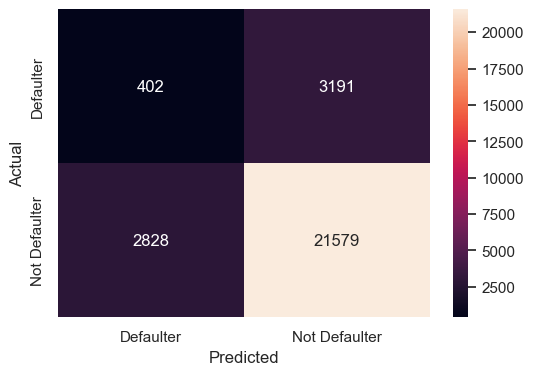

               precision    recall  f1-score   support

    Defaulter       0.12      0.11      0.12      3593
Not Defaulter       0.87      0.88      0.88     24407

     accuracy                           0.79     28000
    macro avg       0.50      0.50      0.50     28000
 weighted avg       0.78      0.79      0.78     28000



In [209]:
#Matriz de confusión

conf_mat_knn = confusion_matrix(y_t, Y_T_knn)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_knn
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_t, Y_T_knn, target_names=dum_test['Risk_Flag'].sort_values().unique()))

En efecto tiene mejores metricas con respecto a la presicion comprado con la regresion logistica, pero no es lo que se esperaba. La presicion en la identificacion de "Defaulter" es muy baja.

El último modelo a evaluar es Random Forest, fue el modelo con las mejores métricas en el entrenamiento. Un accurancy de 90% y precisión en la predicción de "Defaulter" de 60%. Se espera que para estas pruebas ocurra lo mismo y arroje mejores valores que los modelos anteriores.

In [210]:
#Prediccion con Random Forest
Y_T_rf = modelo_final.predict(X = x_t)
Y_T_rf

array(['Not Defaulter', 'Not Defaulter', 'Not Defaulter', ...,
       'Not Defaulter', 'Not Defaulter', 'Defaulter'], dtype=object)

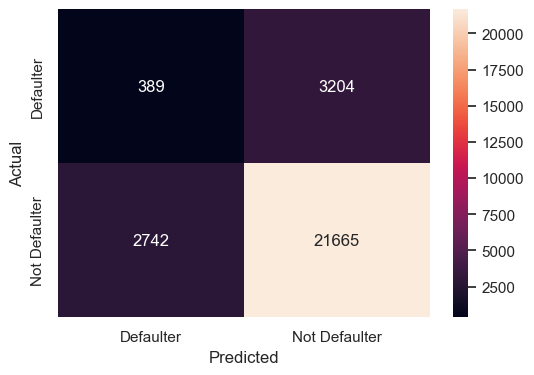

               precision    recall  f1-score   support

    Defaulter       0.12      0.11      0.12      3593
Not Defaulter       0.87      0.89      0.88     24407

     accuracy                           0.79     28000
    macro avg       0.50      0.50      0.50     28000
 weighted avg       0.78      0.79      0.78     28000



In [211]:
#Matriz de confusión

conf_mat_rf = confusion_matrix(y_t, Y_T_rf)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_rf
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_t, Y_T_rf, target_names=dum_test['Risk_Flag'].sort_values().unique()))


El modelo sorprende al arrojar valores similares al modelo de vecinos cercanos, precisiones y accurancy casi que iguales dificulta la decisión de cual modelo tomar como definitivo. Se realizara una comparación entre los dos modelos, KNN y Random Forest para definir el accurancy más alto.


In [264]:
#Accurancy mayor
accurancy_rf = accuracy_score(y_t, Y_T_rf)
accurancy_knn = accuracy_score(y_t, Y_T_knn)

if accurancy_rf>accurancy_knn:
    print(f'Accurancy para Random Forest es: {accurancy_rf} vs Accurancy para KNN es:{accurancy_knn}')
elif accurancy_rf<accurancy_knn:
    print(f'Accurancy para KNN es: {accurancy_knn} vs Accurancy para Random Forest es:{accurancy_rf}')
else:
    print("Sin Definir")

Accurancy para Random Forest es: 0.7876428571428571 vs Accurancy para KNN es:0.7850357142857143


## Conclusion

Para la selección del modelo con el que se trabajaría para desarrollar el objetivo de este trabajo, se tendrán en cuenta las métricas de Accurancy y Precisión. 

Teniendo en cuenta esto, y según la definición de la última línea el modelo a elegir es Random Forest con un accurancy ligeramente más alto que KNN y mejor precisión en la identificación de la variable de salida en comparación con el modelo de Regresión Logística.


## UnderSampling


Se toma la decisión de realizar undersampling a la data para el entrenamiento de los modelos, un poco como consecuencia de los resultados de la evaluación de los modelos, la idea sería entrenar los mismos 3 modelos con el undersampling de la data con la que se entrenaron previamente y al final comparar. El undersamplig se realizará a partir de la data ya preparada, como es una muestra del dataset lo que se tomara, esta limpieza realizada previamente no tendría por qué afectar.

In [212]:
class_count_0, class_count_1 = loan['Risk_Flag'].value_counts()
count_0 = class_count_0/loan.shape[0]
count_1 = class_count_1/loan.shape[0]
relation = (count_0/count_1)-1
print(f'La relacion entre el valor de 0 y 1 en la variable de salida es {relation:.1f}. \n\
Los registros con Risk_Flag = 1 representan el {count_1*100:.1f}% mientras que los registros con valores de 0 para Risk_Flag\n\
representan el {count_0*100:.1f}%')


La relacion entre el valor de 0 y 1 en la variable de salida es 6.1. 
Los registros con Risk_Flag = 1 representan el 12.3% mientras que los registros con valores de 0 para Risk_Flag
representan el 87.7%


Se realizara la separacion los datos que toman cada uno de los valores (0,1)

In [213]:
# Separate class
value_0 = loan[loan['Risk_Flag'] == 0]
value_1 = loan[loan['Risk_Flag'] == 1]# print the shape of the class
print('Value 0:', value_0.shape)
print('Value 1:', value_1.shape)

Value 0: (221004, 10)
Value 1: (30996, 10)




*   Se tomara la muestra de los datos que toman valor 0 en la variable de salida Risk_Flag, el tamaño de la muestra lo dará el tamaño de los datos que toman valor 1 en la variable de salida, que para el caso son 30.996.

*   Se creara un dataframe con la muestra seleccionada en el punto anterior y los registros que toman el valor de 1 en la variable Risk_Flag.


*   Graficaremos posteriormente para ver que la distribucion sea igual

total class of 1 and 0:
 Risk_Flag
0    30996
1    30996
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Risk_Flag'>

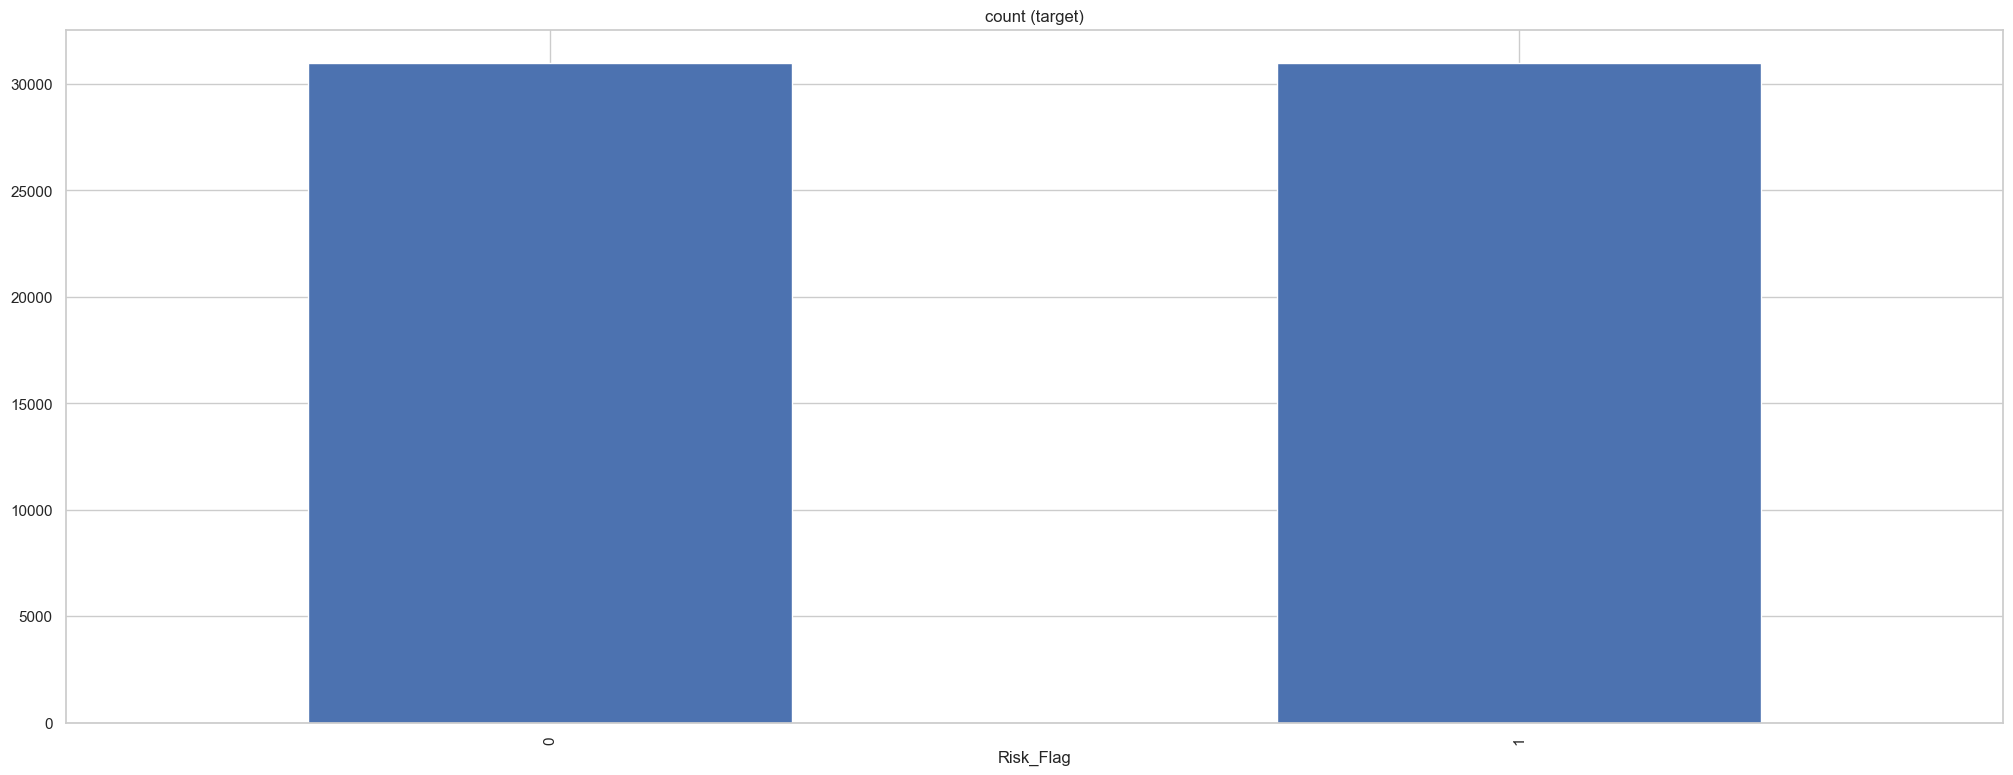

In [214]:
class_0_under = value_0.sample(class_count_1, random_state=1234)

loan_under = pd.concat([class_0_under, value_1], axis=0)

print("total class of 1 and 0:\n",loan_under['Risk_Flag'].value_counts())# plot the count after under-sampeling
loan_under['Risk_Flag'].value_counts().plot(kind='bar', title='count (target)')

Se comprueba que las variables de salida de la data original y la data undersampling, tengan la misma distribucion.

<Axes: xlabel='Risk_Flag', ylabel='Density'>

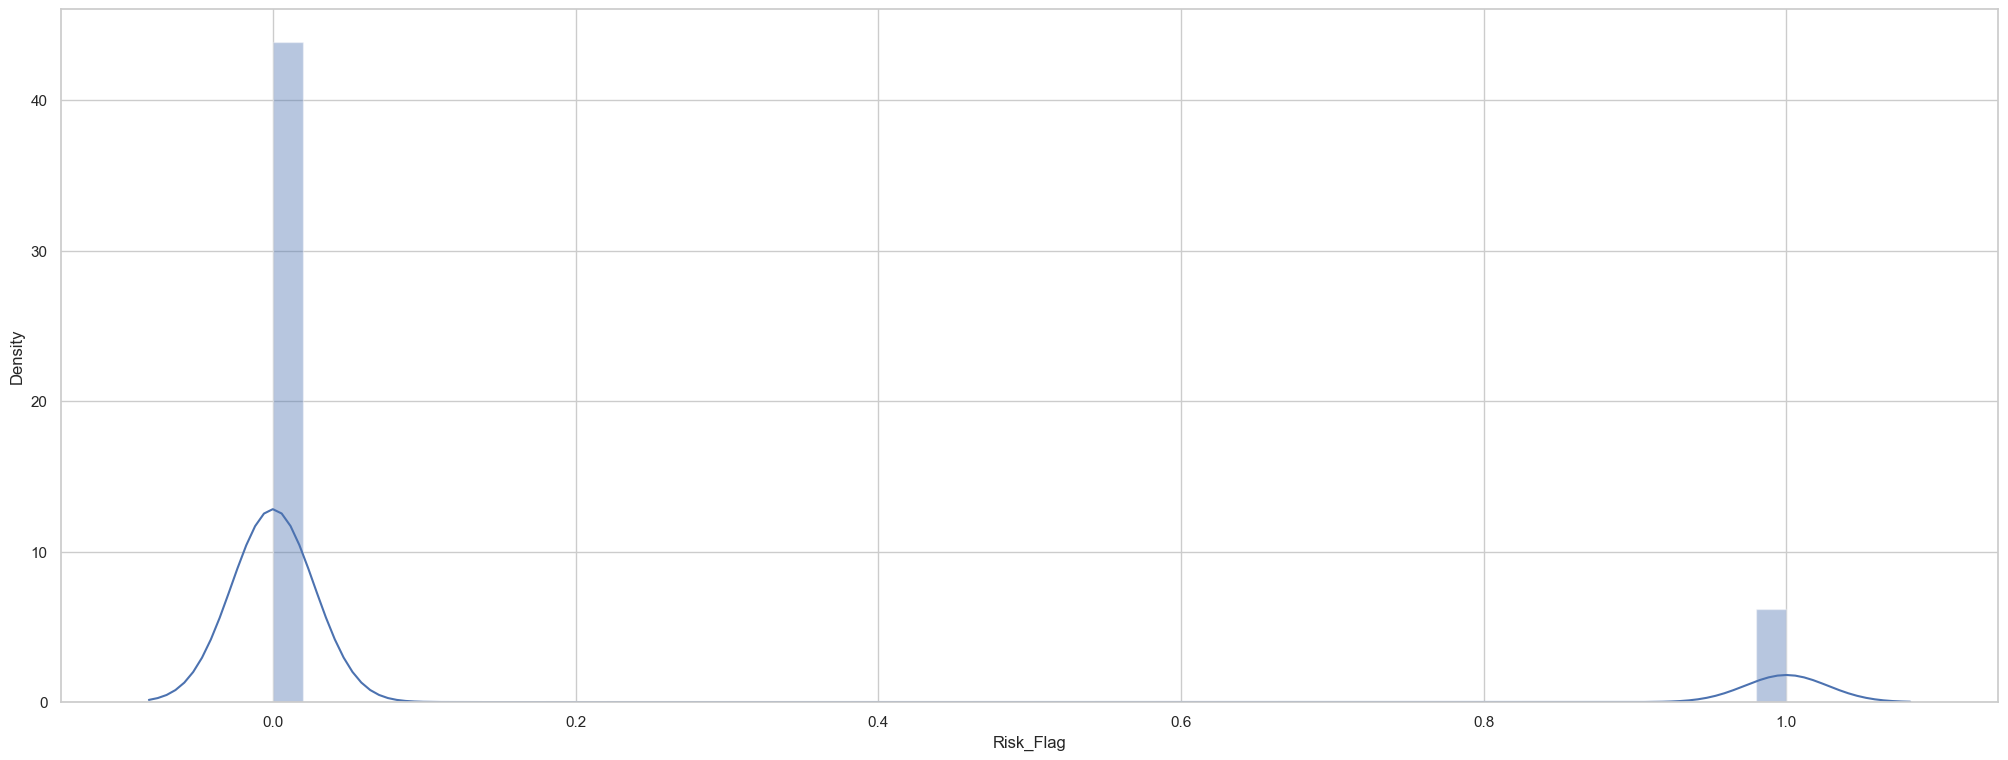

In [215]:
sns.distplot(a=loan["Risk_Flag"])

<Axes: xlabel='Risk_Flag', ylabel='Density'>

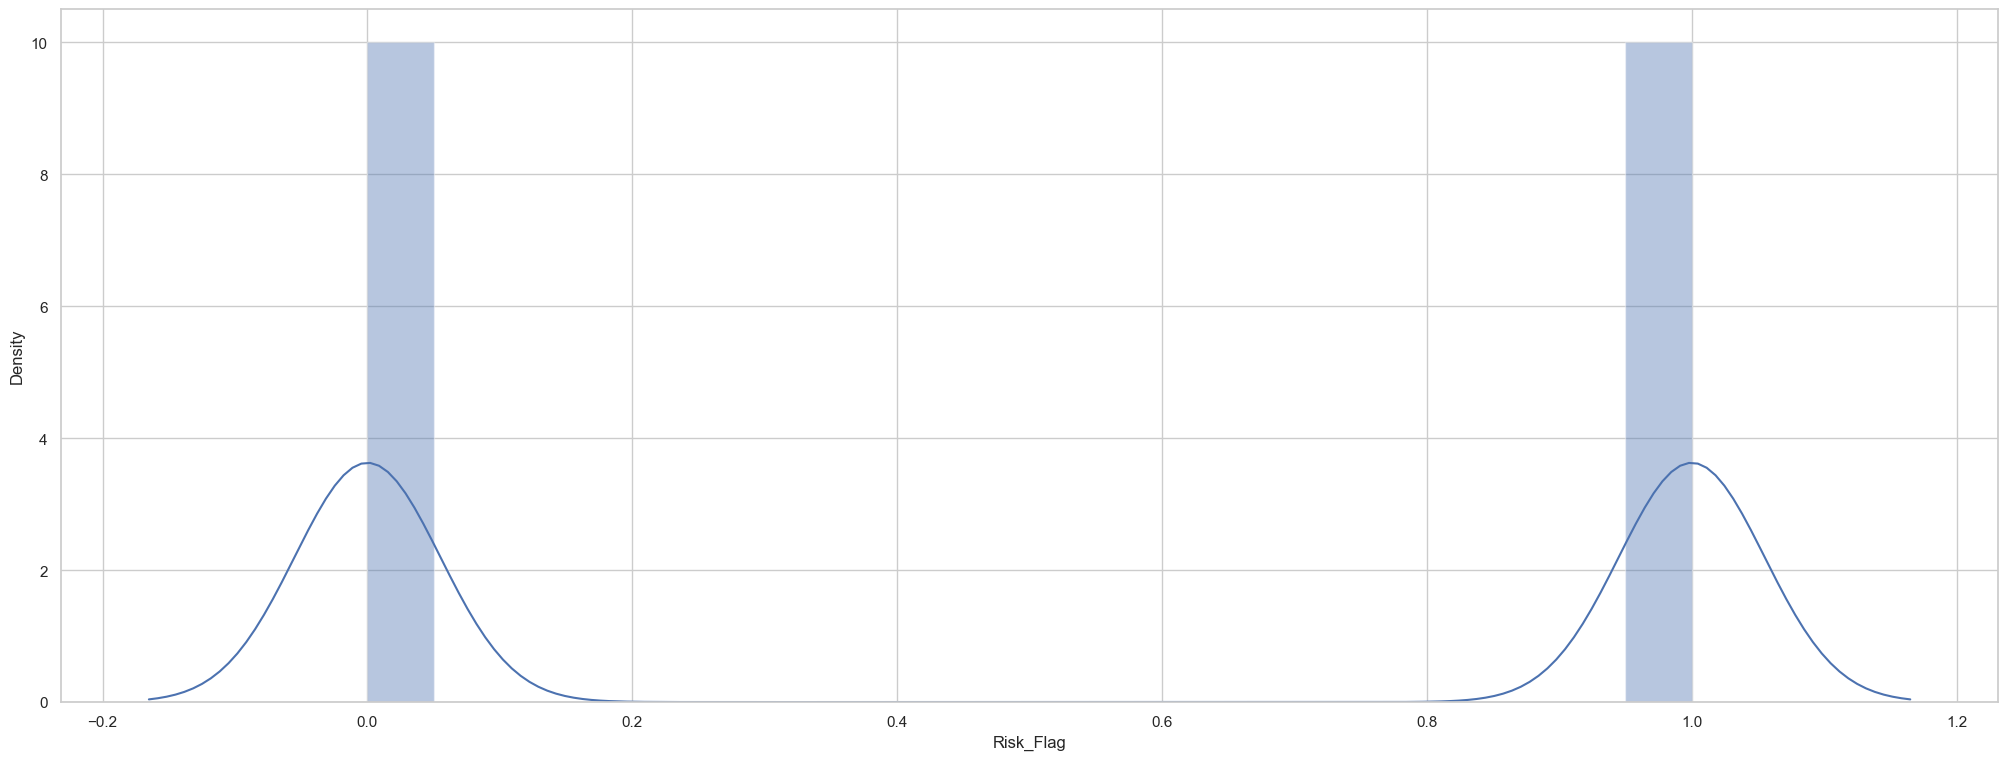

In [216]:
sns.distplot(a=loan_under["Risk_Flag"])

> Verificamos la informacion de la data creada, para conocer que tipo de componen el nuevo dataframe, se espera que sean el mismo tipo para cada caracteristica del dataframe original.



In [217]:
loan_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61992 entries, 64889 to 251993
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             61992 non-null  float64
 1   Age                61992 non-null  float64
 2   Married/Single     61992 non-null  object 
 3   House_Ownership    61992 non-null  object 
 4   Car_Ownership      61992 non-null  object 
 5   Profession         61992 non-null  object 
 6   STATE              61992 non-null  object 
 7   CURRENT_JOB_YRS    61992 non-null  float64
 8   CURRENT_HOUSE_YRS  61992 non-null  float64
 9   Risk_Flag          61992 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 5.2+ MB




> Como el dataframe se creo a partir del dataframe limpio, se espera que no tenga valores nulos o inexistentes. Igual se verificara.







In [218]:
loan_under.isnull().sum()#comprobacion de nulos en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [219]:
loan_under.isna().sum()#comprobacion de datos inexistentes en la base

Income               0
Age                  0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Se procede a la creación de variable dummies para posteriormente entrenar los modelos que se apliquen.

#### Creacion de Variables Dummies

In [220]:
dum_un =pd.get_dummies(loan_under, drop_first=1)

In [221]:
dum_un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61992 entries, 64889 to 251993
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Income                                 61992 non-null  float64
 1   Age                                    61992 non-null  float64
 2   CURRENT_JOB_YRS                        61992 non-null  float64
 3   CURRENT_HOUSE_YRS                      61992 non-null  float64
 4   Risk_Flag                              61992 non-null  int64  
 5   Married/Single_single                  61992 non-null  bool   
 6   House_Ownership_owned                  61992 non-null  bool   
 7   House_Ownership_rented                 61992 non-null  bool   
 8   Car_Ownership_yes                      61992 non-null  bool   
 9   Profession_Analyst                     61992 non-null  bool   
 10  Profession_Architect                   61992 non-null  bool   
 11  Pr

Igual que en la data original, después de la creación de las variables dummies, convertimos a variable categórica la variable de salida, asignándole Defaulter a todos los valores iguales a 1 y Not Defaulter a todos los valores iguales a 0.

In [222]:
dum_un["Risk_Flag"].replace(1,'Defaulter',inplace=True)
dum_un["Risk_Flag"].replace(0,'Not Defaulter',inplace=True)
dum_un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61992 entries, 64889 to 251993
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Income                                 61992 non-null  float64
 1   Age                                    61992 non-null  float64
 2   CURRENT_JOB_YRS                        61992 non-null  float64
 3   CURRENT_HOUSE_YRS                      61992 non-null  float64
 4   Risk_Flag                              61992 non-null  object 
 5   Married/Single_single                  61992 non-null  bool   
 6   House_Ownership_owned                  61992 non-null  bool   
 7   House_Ownership_rented                 61992 non-null  bool   
 8   Car_Ownership_yes                      61992 non-null  bool   
 9   Profession_Analyst                     61992 non-null  bool   
 10  Profession_Architect                   61992 non-null  bool   
 11  Pr

In [223]:
dum_un.head(5)

,Income,Age,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
64889,0.563980,0.672414,0.214286,0.25,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
219602,0.201700,0.568966,0.428571,1.00,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
193692,0.725411,0.586207,0.285714,1.00,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5086,0.203904,0.689655,0.071429,0.75,Not Defaulter,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
47930,0.272350,0.241379,0.285714,1.00,Not Defaulter,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Entrenamiento de Modelos

Se realizara el mismo tratamiento que a la data original, y se serpararn los datos en x como los imput y y como el output o variable de salida.

In [224]:
colum_un = list(dum_un.columns)
colum_un.remove('Risk_Flag')
print(colum_un)

['Income', 'Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married/Single_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes', 'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer', 'Profession_Artist', 'Profession_Aviator', 'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant', 'Profession_Chef', 'Profession_Chemical_engineer', 'Profession_Civil_engineer', 'Profession_Civil_servant', 'Profession_Comedian', 'Profession_Computer_hardware_engineer', 'Profession_Computer_operator', 'Profession_Consultant', 'Profession_Dentist', 'Profession_Design_Engineer', 'Profession_Designer', 'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer', 'Profession_Fashion_Designer', 'Profession_Financial_Analyst', 'Profession_Firefighter', 'Profession_Flight_attendant', 'Profession_Geologist', 'Profession_Graphic_Designer', 'Profession_Hotel_Manager', 'Profession_Industrial_Engineer', 'Profession_Lawyer', 'Profession_Librarian', 'Prof

In [225]:
x_un = dum_un[colum_un]
y_un = dum_un['Risk_Flag']

El tamaño con el que se entrenará el modelo será del 80%, las condiciones serán iguales a la data origina para comparar.

##### Regresion Logistica

El primer modelo que se aplicara, sera regresion logistica. Se tomaran los parametros multi_class = ( ovr, multinomial) y solver = ( libliner, lbfgs)

In [226]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(
                                        x_un,
                                        y_un, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [227]:
#Creación del modelo 

modelLRovrLinea_un       = LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0) #smaller dataset
modelLRovrlbfgs_un       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0) 
modelLRMullbfgs_un       = LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0)

#Entrenamiento del modelo

modelLRovrLinea_un.fit(X_train_un, y_train_un)
modelLRovrlbfgs_un.fit(X_train_un, y_train_un)
modelLRMullbfgs_un.fit(X_train_un, y_train_un)


LogisticRegression(multi_class='multinomial', random_state=0)

In [228]:
y_predovrLinea_un = modelLRovrLinea_un.predict(X_test_un)
y_predovrlbfgs_un = modelLRovrlbfgs_un.predict(X_test_un)
y_predMullbfgs_un = modelLRMullbfgs_un.predict(X_test_un)

###### Accurancy

In [229]:
print("===========Accuracy Logistic Regression ================")
print("ovr - Linear       :",metrics.accuracy_score(y_test_un, y_predovrLinea_un))
print("ovr - lbfgs        :",metrics.accuracy_score(y_test_un, y_predovrlbfgs_un))
print("multinomial - lbfgs:",metrics.accuracy_score(y_test_un, y_predMullbfgs_un))

===========Accuracy Logistic Regression ================
ovr - Linear       : 0.5506895717396564
ovr - lbfgs        : 0.5506089200741995
multinomial - lbfgs: 0.5506895717396564


En este caso los mejores acurrancy los dan los modelos con los hiperparámetros ovr - Linear y multinomial - lbfgs. Para la matriz de confusión se tomará el modelo creado con los parámetros ovr - Linear. Igual se observa que estos valores bajan en comparación con el modelo entrenado con el total de la data.

###### Matriz de Confusión

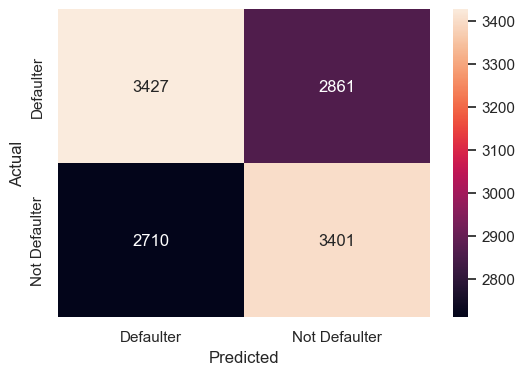

               precision    recall  f1-score   support

    Defaulter       0.56      0.55      0.55      6288
Not Defaulter       0.54      0.56      0.55      6111

     accuracy                           0.55     12399
    macro avg       0.55      0.55      0.55     12399
 weighted avg       0.55      0.55      0.55     12399



In [230]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test_un, y_predovrLinea_un)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum_un['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_un['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_un, y_predovrLinea_un, target_names=dum_un['Risk_Flag'].sort_values().unique()))

Con respecto al modelo de regresión logística entrenado con toda la data, tiene un accurancy más bajo, al igual que una precisión más baja al detectar "Not defaulter", sin embargo, mejora la precisión en la detención de "Defaulter".

###### Curva ROC

In [231]:
#Convertir y_test Not Defaulter y Defaulter en 1 y 0

e_dataframe_rl = pd.DataFrame(y_test_un)
e_dataframe_rl.replace('Not Defaulter',1, inplace=True)
e_dataframe_rl.replace('Defaulter', 0,inplace=True)
arr_rl = e_dataframe_rl.to_numpy()

AUC: 0.43


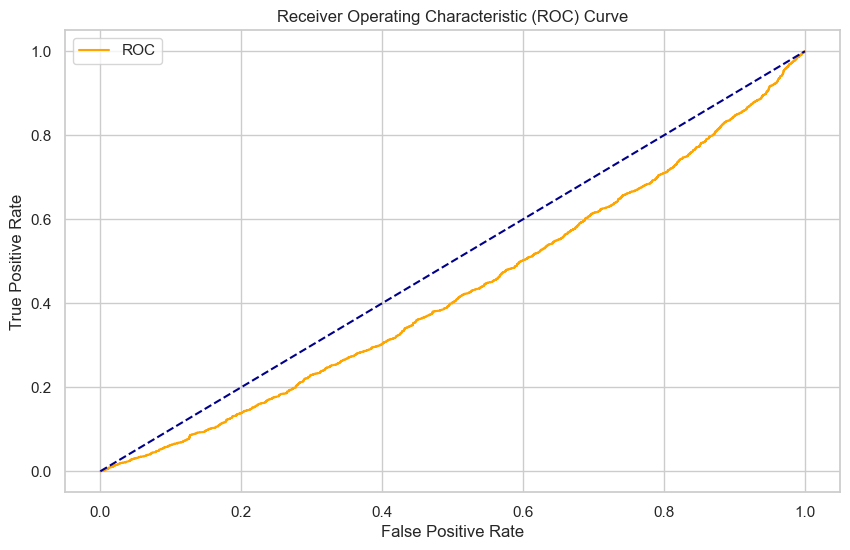

In [232]:
fig = plt.figure(figsize=(10,6))


probs = modelLRovrLinea_un.predict_proba(X_test_un)
probs = probs[:, 1]
auc_rl = roc_auc_score(arr_rl, probs*(-1))

print('AUC: %.2f' % auc_rl)
fpr, tpr, thresholds = roc_curve(arr_rl, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

Es un modelo que mejora en algunas métricas cuando es entrenado con una data a la cual se le aplico undersampling, sin embargo, en otras bajan sus valores considerablemente.

##### KNN

##### Division de Datos


Como en los modelos previamente entrenados, se seleccionara el 80% de la data para entrenamiento.

In [233]:
X_train_un_knn, X_test_un_knn, y_train_un_knn, y_test_un_knn = train_test_split(
                                        x_un,
                                        y_un, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

###### Creacion y entrenamiento del modelo

Como en el modelo entrenado con toda la data, la validación cruzada dio como resultado que sean 7 los vecinos, este modelo se entrenara con el mismo valor.

In [234]:
#Creación del modelo 

modelKNN_un       = KNeighborsClassifier(n_neighbors=7)

modelKNN_un.fit(X_train_un_knn, y_train_un_knn)


KNeighborsClassifier(n_neighbors=7)

###### Acurrancy

In [235]:
y_modelKNN_un = modelKNN_un.predict(X_test_un_knn)

print("===========Accuracy KNN ================")
print("modelKNN:",metrics.accuracy_score(y_test_un_knn, y_modelKNN_un))

===========Accuracy KNN ================
modelKNN: 0.8245826276312606


Con respecto al modelo entrenado con toda la data, este modelo arroja un acurrancy menor, pero nada que se considere que no vaya a ser bueno.

###### Matriz de Confusión

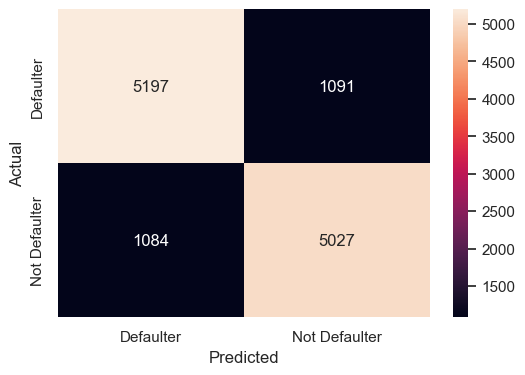

               precision    recall  f1-score   support

    Defaulter       0.83      0.83      0.83      6288
Not Defaulter       0.82      0.82      0.82      6111

     accuracy                           0.82     12399
    macro avg       0.82      0.82      0.82     12399
 weighted avg       0.82      0.82      0.82     12399



In [236]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test_un_knn, y_modelKNN_un)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum['Risk_Flag'].sort_values().unique()
            , yticklabels=dum['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_un_knn, y_modelKNN_un, target_names=dum['Risk_Flag'].sort_values().unique()))

Se observan mejores métricas que el modelo de regresión logística entrenado con la data undersampling, en comparación con el modelo entrenado con toda la data, mejora la precisión en identificar "Defaulter” y aunque la precisión en la identificación de "Not Defaulter" disminuye no es algo que sea inquietante.

###### Curva ROC

In [237]:
#Convertir y_test Defaulter y Not Defaulter en 1 y 0

e_dataframe_knn = pd.DataFrame(y_test_un_knn)
e_dataframe_knn.replace('Defaulter',1, inplace=True)
e_dataframe_knn.replace('Not Defaulter', 0,inplace=True)
arr_knn = e_dataframe_knn.to_numpy()

AUC: 0.87


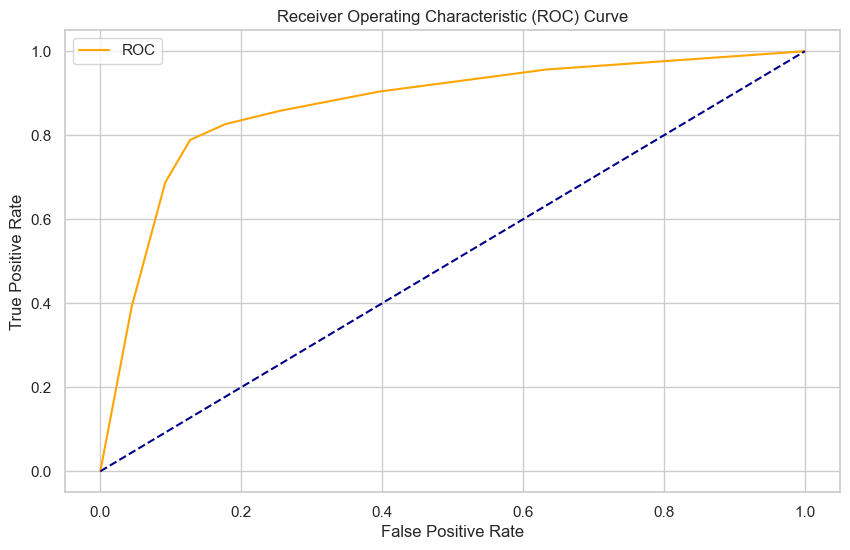

In [238]:
fig = plt.figure(figsize=(10,6))


probs = modelKNN_un.predict_proba(X_test_un_knn)
probs = probs[:, 1]
auc_knn = roc_auc_score(arr_knn, probs*(-1))

print('AUC: %.2f' % auc_knn)
fpr, tpr, thresholds = roc_curve(arr_knn, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

Aunque el AUC de este modelo es menor al calculado para el modelo entrenado con toda la data, la diferencia no se considera preocupante.


##### Random Forest Clasificacion

El siguiente modelo a implementar será Arboles de decisión o Random Forest Clasification

###### Division de datos

Al igual que en el entrenamiento de los modelos anteriores, este se realizará con el 80% de los datos.

In [239]:
x_train_rf_un, x_test_rf_un, y_train_rf_un, y_test_rf_un = train_test_split(
                                        x_un,
                                        y_un, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

###### Creacion y entrenamiento del modelo

Se realizarán dos tipos de grid y se elegirá el que cuente con el mejor accurancy para el entrenamiento del modelo.

Grid Search basado en out-of-bag score

In [240]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train_rf_un, y_train_rf_un)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head()

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
2,0.851310,gini,NaN,9,150
1,0.851027,gini,NaN,7,150
14,0.851007,entropy,NaN,9,150
0,0.850322,gini,NaN,5,150
13,0.850322,entropy,NaN,7,150


In [241]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.85130966063759 : 0.85130966063759 accuracy


Grid Search basado en validación cruzada

In [242]:
# # Grid de hiperparámetros evaluados
# # ==============================================================================
# param_grid = {'n_estimators': [150],
#               'max_features': [5, 7, 9],
#               'max_depth'   : [None, 3, 10, 20],
#               'criterion'   : ['gini', 'entropy']
#              }

# # Búsqueda por grid search con validación cruzada
# # ==============================================================================
# grid = GridSearchCV(
#         estimator  = RandomForestClassifier(random_state = 123),
#         param_grid = param_grid,
#         scoring    = 'accuracy',
#         n_jobs     = multiprocessing.cpu_count() - 1,
#         cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
#         refit      = True,
#         verbose    = 0,
#         return_train_score = True
#        )

# grid.fit(x_train_rf_un, y_train_rf_un)

# # Resultados
# # ==============================================================================
# resultados = pd.DataFrame(grid.cv_results_)
# resultados.filter(regex = '(param*|mean_t|std_t)') \
#     .drop(columns = 'params') \
#     .sort_values('mean_test_score', ascending = False) \
#     .head(4)

In [243]:
# # Mejores hiperparámetros por validación cruzada
# # ==============================================================================
# print("----------------------------------------")
# print("Mejores hiperparámetros encontrados (cv)")
# print("----------------------------------------")
# print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Al igual que con el grid realizado con la data completa este tomo mucho tiempo, pero tiene el mejor accurancy y serán estos hiperparametros los seleccionados para entrenar el modelo.

In [244]:
modelo_final_un =RandomForestClassifier(criterion='gini',max_depth=None,max_features=5,n_estimators=150)
modelo_final_un.fit(x_train_rf_un, y_train_rf_un)

RandomForestClassifier(max_features=5, n_estimators=150)

In [245]:
# Error de test del modelo final
# ==============================================================================
predicciones_un = modelo_final_un.predict(X = x_test_rf_un)
predicciones_un[:10]

array(['Not Defaulter', 'Not Defaulter', 'Defaulter', 'Defaulter',
       'Defaulter', 'Not Defaulter', 'Defaulter', 'Not Defaulter',
       'Defaulter', 'Not Defaulter'], dtype=object)

###### Matriz de Confusion

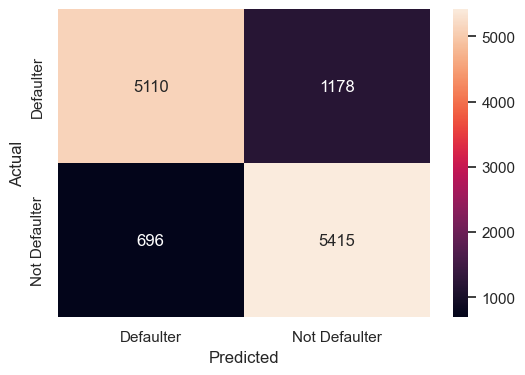

               precision    recall  f1-score   support

    Defaulter       0.88      0.81      0.85      6288
Not Defaulter       0.82      0.89      0.85      6111

     accuracy                           0.85     12399
    macro avg       0.85      0.85      0.85     12399
 weighted avg       0.85      0.85      0.85     12399



In [246]:
# Matriz de confusión

conf_mat = confusion_matrix(y_test_rf_un, predicciones_un)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=dum['Risk_Flag'].sort_values().unique()
            , yticklabels=dum['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_rf_un, predicciones_un, target_names=dum['Risk_Flag'].sort_values().unique()))

Se denota una mejor precisión en la identificación de los "Defaulter", también se ve una disminución en el accurancy y precisión en la identificacion de "Not Defaulter" respecto al modelo entrenado con toda la data. Sin embargo, es un buen modelo y el que mejores metricas arroja de los entrenados con la data con udersampling.

###### Curva ROC

In [247]:
#Convertir y_test Defaulter y Not Defaulter en 1 y 0

e_dataframe_rf_un = pd.DataFrame(y_test_rf_un)
e_dataframe_rf_un.replace('Defaulter',1, inplace=True)
e_dataframe_rf_un.replace('Not Defaulter', 0,inplace=True)
arr_rf_un = e_dataframe_rf_un.to_numpy()

AUC: 0.94


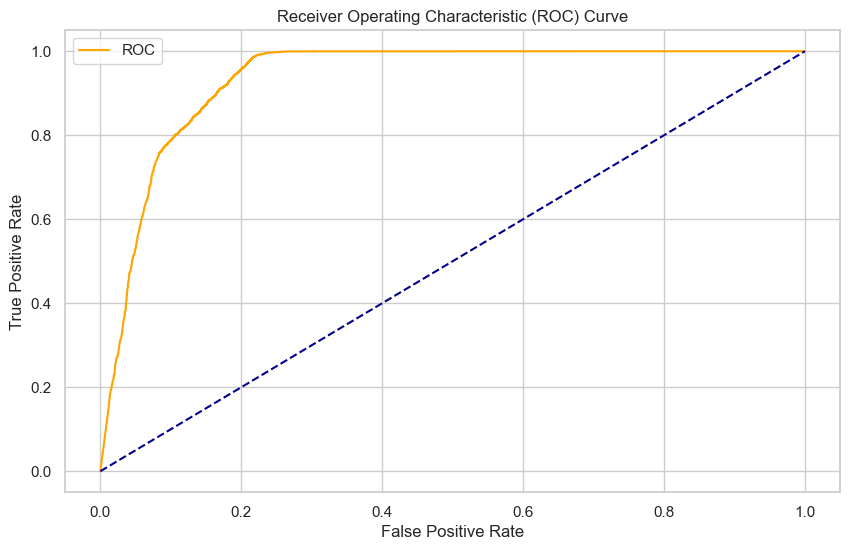

In [248]:
fig = plt.figure(figsize=(10,6))


probs = modelo_final_un.predict_proba(x_test_rf_un)
probs = probs[:, 1]
auc_rf_un = roc_auc_score(arr_rf_un, probs*(-1))

print('AUC: %.2f' % auc_rf_un)
fpr, tpr, thresholds = roc_curve(arr_rf_un, probs*(-1))
plot_roc_curve(fpr, tpr)

Conclusión:

Presenta mejores valores de precisión para la variable de salida y conserva el valor de AUC del modelo entrenado con el total de la data.


## Torneo de Modelos.

Al igual que con los modelos entrenados con el total de la data, se realizará un torneo de modelos donde se evaluarán los tres modelos, tomando los hiperparametros con mejores métricas. Estos se evaluarán con la data de prueba con la que se evaluó los modelos entrenados con el total del dataset, así que no se repetirán pasos como cargue y exploración, sino se pasara a la prueba de los modelos.

### Prueba de los modelos.

Se separaran las variables en unas diferentes para hacer las evaluaciones con el dataset de prueba.

In [249]:
x_tt = dum_test[colum]
y_tt = dum_test['Risk_Flag']

Se iniciará evaluando el modelo de regresión logística, se espera que arroje metricas similares a las de entrenamiento con este dataset de prueba.

In [250]:
#Prediccion con Regresion Logistica
y_tt_rl= modelLRovrLinea_un.predict(x_tt)


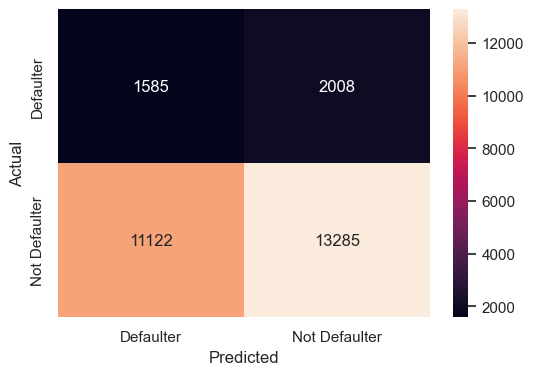

               precision    recall  f1-score   support

    Defaulter       0.12      0.44      0.19      3593
Not Defaulter       0.87      0.54      0.67     24407

     accuracy                           0.53     28000
    macro avg       0.50      0.49      0.43     28000
 weighted avg       0.77      0.53      0.61     28000



In [251]:
#Matriz de confusión de regresion logistica

conf_mat_rl_ = confusion_matrix(y_tt, y_tt_rl)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_rl_
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_tt, y_tt_rl, target_names=dum_test['Risk_Flag'].sort_values().unique()))

Las metricas disminuyen en comparacion con las dadas en el entrenamiento del modelo, el accurancy baja considerablemente de 0.8 a 0.5

El siguiente modelo a evaluar con la data de prueba es KNN, se espera que sus métricas sean similares a las entrenadas con la data undersampling.

In [252]:
#Prediccion con KNN
y_tt_knn = modelKNN_un.predict(x_tt)
y_tt_knn

array(['Not Defaulter', 'Not Defaulter', 'Not Defaulter', ...,
       'Not Defaulter', 'Defaulter', 'Defaulter'], dtype=object)

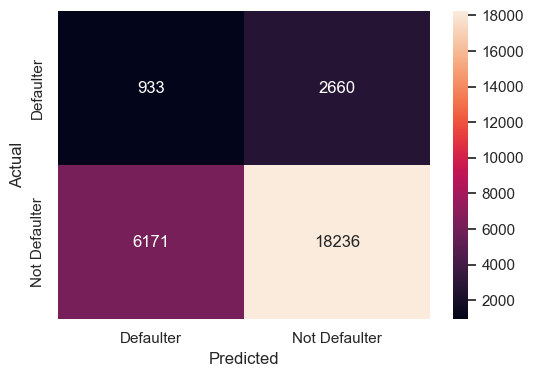

               precision    recall  f1-score   support

    Defaulter       0.13      0.26      0.17      3593
Not Defaulter       0.87      0.75      0.81     24407

     accuracy                           0.68     28000
    macro avg       0.50      0.50      0.49     28000
 weighted avg       0.78      0.68      0.72     28000



In [253]:
#Matriz de confusión

conf_mat_knn_ = confusion_matrix(y_tt, y_tt_knn)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_knn_
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_tt, y_tt_knn, target_names=dum_test['Risk_Flag'].sort_values().unique()))

La mertricas disminuyen en comparacion con las dadas para el modelo de entrenamiento, el accurancy tambien disminuye de 0.8 a 0.6.

El último modelo que se probara, es el entrenado por Random Forest. Tanto con el modelo entrenado con el total de la data como con la data undersamplig, este ha arrojado las métricas más altas, por lo que se esperaría que esta tendencia no cambie y suceda lo mismo con esta prueba.

In [254]:
#Prediccion con Random Forest
y_tt_rf = modelo_final_un.predict(X = x_tt)
y_tt_rf

array(['Not Defaulter', 'Not Defaulter', 'Not Defaulter', ...,
       'Not Defaulter', 'Defaulter', 'Defaulter'], dtype=object)

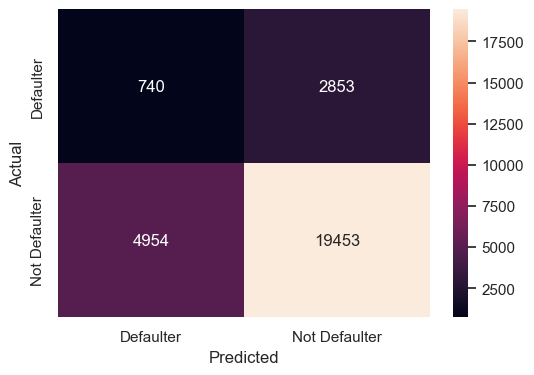

               precision    recall  f1-score   support

    Defaulter       0.13      0.21      0.16      3593
Not Defaulter       0.87      0.80      0.83     24407

     accuracy                           0.72     28000
    macro avg       0.50      0.50      0.50     28000
 weighted avg       0.78      0.72      0.75     28000



In [255]:
#Matriz de confusión

conf_mat_rf_ = confusion_matrix(y_tt, y_tt_rf)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_rf_
            , annot=True
            , fmt='d'
            , xticklabels=dum_test['Risk_Flag'].sort_values().unique()
            , yticklabels=dum_test['Risk_Flag'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_tt, y_tt_rf, target_names=dum_test['Risk_Flag'].sort_values().unique()))

En efecto, aunque sus métricas disminuyen respecto a las arrojadas en el entrenamiento, es el modelo con el accurancy más alto.

## Conclusion.

Como se precisó anteriormente, las métricas que se usaran para la selección del modelo son Accurancy y Precisión. 

Teniendo en cuenta esto, el modelo a elegir es Random Forest con un accurancy más alto que los otros dos modelos entrenados con la data undersamplig, y una precisión alta.


Entre los dos modelos de Random Forest, el entrenado con el total de la data y con la data undersampling, y tomado en cuenta las métricas de Accurancy y Precisión, se tomará el entrenado con la data undersamplig. Aunque su accurancy es bajo con respecto al modelo entrenado con toda la data la precisión es ligeramente más alta para identificar "Defaulter", que se considera como los críticos a identificar, igual que el recall o verdaderos positivos es más alta en este modelo y el costo computacional usando un modelo entrenado con data undersamplig tiende a ser más bajo.
